# Physik der sozio-ökonomischen Systeme mit dem Computer
# (Physics of Socio-Economic Systems with the Computer)

### Vorlesung gehalten an der J.W.Goethe-Universität in Frankfurt am Main 
#### (Wintersemester 2025/26)

### von Dr.phil.nat. Dr.rer.pol. Matthias Hanauske

### Frankfurt am Main 22.08.2025


### Dritter Vorlesungsteil:  
### Evolutionäre Spiele auf komplexen Netzwerken
#### Beispiel: Evolutionäre Spiele auf unterschiedlichen Netzwerk-Topologien


## Einführung

Die Verkn&uuml;pfung der Theorie komplexer Netzwerke (siehe Teil II der Vorlesung) mit der evolution&auml;ren Spieltheorie (siehe Teil I der Vorlesung) stellt ein vielversprechendes mathematisches Modell dar, welches sowohl der interdisziplin&auml;ren Grundlagenforschung, als auch der angewandten, empirischen Netzwerkforschung dienen kann. In diesem Kapitel wird die Vorgehensweise einer Miteinbeziehung komplexer Netzwerktopologien in die evolution&auml;re Spieltheorie beschrieben. Die dann auf einem solchen komplexen Netzwerk ablaufenden Entscheidungsprozesse k&ouml;nnen in den meisten F&auml;llen lediglich mittels numerischer, Agenten-basierter Computersimulationen veranschaulicht werden.

In den beiden letzten Jupyter Notebooks hatten wir die Spieler einer endlich gro&szlig;en Population auf einem r&auml;umlichen Gitter angeordnet, wobei jeder Spieler nur mit seinen n&auml;chsten Nachbarn spielen kann (<i>Moore Nachbarschaft</i>). Das zugrundeliegende Netzwerk der Spielerknoten hatte somit eine einfache regul&auml;re Struktur und im betrachteten 2-dimensionalen Fall spielte jeder Spieler pro Spielperiode mit acht Spielern (Knotengrad $k_i=8\, \forall\, i \in {\cal I}$). In diesem Jupyter Notebook wollen wir das Spiel auf unterschiedlichen Netzwerken spielen.

Wir beschr&auml;nken uns im folgenden wieder auf symmetrische (2x2)-Spiele und benutzen den Ansatz eines allgemeinen (2 Personen)-(2 Strategien) Spiels mit symmetrischer Auszahlungsmatrix und Parametern a, b, c und d. Die Spielerknoten spielen pro Iteration mit ihren k-nächsten direkten Nachbarn im Netzwerk und am Ende von jedem Zeitschritt vergleichen die Spieler ihren durchschnittlichen, pro Person erzielten Gewinn/Verlust mit den Nachbarspielern mit denen sie das Spiel spielten. Ist der gemittelte Wert der Auszahlung eines Spielers h&ouml;her als der eigene mittlere Auszahlungswert, so &auml;ndert der Spieler in der n&auml;chsten Spielperiode seine Strategie; ist sein eigener Wert der h&ouml;chste, so bleibt er auch in der n&auml;chsten Iteration bei seiner gespielten Strategie.

Im Folgenden betrachten wir zun&auml;chst Beispiele von Koordinationsspielen und vergleichen die zeitliche Entwicklung der räumlichen Spiele mit den Ergebnissen der klassischen evolutionären Spieltheorie und den simulierten Resultaten der räumlichen Spiele. Bevor wir jedoch zu den evolutionären Spielen auf zufälligen, 'kleine Welt' und skalenfreien Netzwerken kommen, rekapitulieren wir die Ergebnisse der klassischen evolutionären Spieltheorie und der räumlichen Spiele am Beispiel eines Koordinationsspiels.

### Die Klasse der Koordinationsspiele ( a > c und b < d )

#### Wiederholung aus Teil I: 

In der klassischen evolutionären Spieltheorie (siehe Teil I der Vorlesung) betrachtete man eine unendlich große Population von Spielern, wobei jeder Spieler im Prinzip mit jedem anderen Spieler in Kontakt treten und das Spiel spielen konnte. Mittels der Replikatordynamik konnten wir dann das zeitliche Verhalten des Populationsvektors $x(t)$ (Anteil der Spieler, die die Strategie $s_1\hat{=}$<i>Blau</i> spielen) berechnen.

Wir nehmen im Folgenden ein allgemeines symmetrisches (2x2)-Spiel mit folgender Auszahlungsmatrix an:

$   \hat{\bf {\cal \$}}=
  \left( {\begin{array}{cc}
   a & b \\
   c & d \\
  \end{array} } \right)
$

Ein Koordinationsspiel existiert, falls die Parameter a, b, c und d der Auszahlungsmatrix die folgenden Bedingungen erfüllen: a > c und b < d . Bei dieser Spielklasse existieren drei Nash-Gleichgewichte, ein gemischtes Nash-Gleichgewicht und zwei reine, symmetrische Nash-Gleichgewicht bei (x,y)=(0,0) und (x,y)=(1,1). 

Abhängig von der gewählten Anfangszusammensetzung der Population entwickelt sich die Population in einem Koordinationsspiel zu einem Zustand, in dem entweder alle Spieler die Strategie 2 (rot, x=0) bzw. alle die Strategie 1 (blau, x=1) wählen. Ist der Wert der gewählten Anfangszusammensetzung größer (bzw. kleiner) als ein bestimmter kritischer Wert, so wird die Strategienwahl der Population im Laufe der Zeit zu x=1 (bzw. x=0) gezogen - man sagt, es gibt zwei evolutionär stabile Strategien in Koordinationsspielen. Der kritische Anfangswertwert $x^\star$ entspricht dem gemischten Nash-Gleichgewicht des zugrundeliegenden Koordinationsspiels und ist außerdem die interne Nullstelle der Funktion g(x), die die Differentialgleichung bestimmt (g(x)=0).

Wir legen zunächst die Auszahlungsmatrix des Koordinationsspiels fest

$   \hat{\bf {\cal \$}}=
  \left( {\begin{array}{cc}
   3 & 4 \\
   1 & 5 \\
  \end{array} } \right)
$

und definieren wir die gemischte Auszahlungsfunktion ${\bf \tilde{\cal \$}}(x,y)$ der Spieler:

In [1]:
a,b,c,d = 3,4,1,5
def Dollar(x,y):
    GemischteAuszahlung=a*x*y+b*x*(1-y)+c*(1-x)*y+d*(1-x)*(1-y)
    return GemischteAuszahlung

Definition der Funktion g(x) und der Differentialgleichung des evolutionären Spiels.

In [2]:
def g(x,a,b,c,d):
    g=((a-c)*(x-x*x) + (b-d)*(1-2*x+x*x))*x
    return g
def DGL(x,t):
    dxdt = g(x,a,b,c,d)
    return dxdt

In der folgenden Animation werden zunächst die Ergebnisse der zeitlichen Entwicklung des räumlichen Spiels (reguläre Struktur, 2-dimensionalen Fall(Moore Nachbarschaft)) mit den Ergebnissen der klassischen evolutionären Spieltheorie verglichen. Wir initialisieren am Anfang eine zufällige Strategienwahl der Spieler auf dem räumlichen Netzwerk, wobei im Mittel 60% der Spieler die Strategie "blau" spielen ($x_0=x(t=0)=0.6$).

In [3]:
import networkx as nx
from random import uniform
import random
from random import randint
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib
import matplotlib.animation as animation
from IPython.display import HTML
import matplotlib.gridspec as gridspec
from scipy import integrate
params = {
    'figure.figsize'    : [10,4.5],
    'text.usetex'       : True,
    'axes.titlesize' : 14,
    'axes.labelsize' : 16,  
    'xtick.labelsize' : 14 ,
    'ytick.labelsize' : 14 
}
matplotlib.rcParams.update(params) 

In [4]:
G=nx.Graph()
Nx=35
Ny=35
N=int(Nx*Ny)
x0=0.6
Nit=11
PropPlayers=np.zeros([N,10])
AverageStratPlayers=np.zeros([Nit+1,2])
for it in range(1,Nit+1):
    AverageStratPlayers[it].flat[0] = -1

k=0
ColorPlayer=[]
for i in range(0,Nx):
    for j in range(0,Ny):
        G.add_node(k)
        PropPlayers[k].flat[0] = k #Knotennummer
        PropPlayers[k].flat[1] = i #x-Koordinate auf dem 2-D Gitter
        PropPlayers[k].flat[2] = j #y-Koordinate auf dem 2-D Gitter
        strategy=uniform(0, 1000)#Zufaellige Strategienwahl 
        if strategy>=x0*1000:
            PropPlayers[k].flat[3]=0 #entspricht Strategie s_2
            ColorPlayer.append("red")
        else:
            PropPlayers[k].flat[3]=1 #entspricht Strategie s_1
            ColorPlayer.append("blue")
        
        center = i*Ny + j
        upperleft = ((i-1)%Nx)*Ny + (j-1)%Ny
        up = ((i  )%Nx)*Ny + (j-1)%Ny
        upperright = ((i+1)%Nx)*Ny + (j-1)%Ny
        right = ((i+1)%Nx)*Ny + (j  )%Ny
        lowerright = ((i+1)%Nx)*Ny + (j+1)%Ny
        low = ((i  )%Nx)*Ny + (j+1)%Ny
        lowerleft = ((i-1)%Nx)*Ny + (j+1)%Ny
        left = ((i-1)%Nx)*Ny + (j  )%Ny
        G.add_edge(center, upperleft)
        G.add_edge(center, up)
        G.add_edge(center, upperright)
        G.add_edge(center, right)
        G.add_edge(center, lowerright)
        G.add_edge(center, low)
        G.add_edge(center, lowerleft)
        G.add_edge(center, left)
        k=k+1

tval = np.linspace(0, Nit, 1001)
cmap = plt.cm.Blues 
numx0 = 30
line_colors = cmap(np.linspace(0,1,numx0+10))
x0=np.linspace(0.01,0.99,numx0)

fig = plt.figure()
gs = gridspec.GridSpec(1, 2, width_ratios=[1,1], wspace=0.3)
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])

j = 0
while j < numx0:
    Loes = integrate.odeint(DGL, x0[j], tval)
    ax1.plot(tval,Loes,c=line_colors[j+5], linewidth=1.5, linestyle='-');
    j = j + 1 
ax1.set_ylabel(r"$\rm x(t)$")
ax1.set_xlabel(r"$\rm t$")
ax1.set_xlim(0,Nit-1)
ax1.set_ylim(0,1)

def init():   
    ax2.scatter(PropPlayers[:,1],PropPlayers[:,2],s=30,c=ColorPlayer,marker="s",alpha=1,edgecolor='none')
    ax2.set_xlim(-0.75, Nx-0.25)
    ax2.set_ylim(-0.75, Ny-0.25)
    ax2.set_ylabel(r"$\rm y$")
    ax2.set_xlabel(r"$\rm x$")
    AverageStratPlayers[0].flat[0]=np.sum(PropPlayers[:,3])/N
    ax1.scatter(0,AverageStratPlayers[0,0], alpha=1, c="black",marker="o",s=50)
    return fig,

def animate(i):
    ax2.cla()
    for games in list(G.edges):
        PropPlayers[games[0]].flat[4] = Dollar(PropPlayers[games[0],3],PropPlayers[games[1],3]) + PropPlayers[games[0],4] 
        PropPlayers[games[1]].flat[4] = Dollar(PropPlayers[games[1],3],PropPlayers[games[0],3]) + PropPlayers[games[1],4] 
    for n in range(0,N):
        PropPlayers[n].flat[5]=PropPlayers[n,3]
        maxpayoff=PropPlayers[n,4]/G.degree(n)
        for neig in list(G.neighbors(n)):
            if PropPlayers[neig,4]/G.degree(neig) > PropPlayers[n,4]/G.degree(n) and PropPlayers[neig,4]/G.degree(neig) > maxpayoff:
                maxpayoff = PropPlayers[neig,4]/G.degree(neig)
                PropPlayers[n].flat[5] = PropPlayers[neig,3]
    ColorPlayernew=[]
    ColorPlayer=[]
    for n in range(0,N):
        if PropPlayers[n,5]==0:
            ColorPlayernew.append("red")
        if PropPlayers[n,5]==1:
            ColorPlayernew.append("blue")
        if PropPlayers[n,3]==0:
            ColorPlayer.append("red")
        if PropPlayers[n,3]==1:
            ColorPlayer.append("blue") 
        PropPlayers[n].flat[3] = PropPlayers[n,5]
        PropPlayers[n].flat[4] = 0
    AverageStratPlayers[i+1].flat[0]=np.sum(PropPlayers[:,3])/N
    ax1.plot(range(0,i+1,1),AverageStratPlayers[0:i+1,0], linewidth=1, linestyle='-', alpha=1, c="black")
    ax2.scatter(PropPlayers[:,1],PropPlayers[:,2],s=30,c=ColorPlayer,marker="s",alpha=1,edgecolor='none')
    ColorPlayer=ColorPlayernew
    return fig,

ani = animation.FuncAnimation(fig,animate,init_func=init,frames=Nit,interval=700)

plt.close(ani._fig)

HTML(ani.to_html5_video())

Left: Evolution of the population vector $x^{\tiny \rm SP}(t)$ of the spatial game with random initial conditions (black curve, $x^{\tiny \rm SP}_0=0.6$) in comparison with the results obtained for several different initial values within the evolutionary game theoretical framework ($x(t)$, solid blue curves). Right: Spatial allocation of player decisions within a regular grid using the ''Moore neighborhood'' configuration. 

Die schwarze Kurve in der oberen Animation zeigt, dass sich bei dem räumlichen Spiel in der ersten Spielperiode der Anteil der blauen Spieler zunächst erhöht, dann jedoch monoton abfällt, so dass sich schließlich die rote Strategie durchsetzt. Vergleicht man diese Ergebnisse mit den Ergebnissen der evolutionären Spieltheorie (blaue Kurven), so würde man bei diesem Koordinationsspiel erwarten, dass sich die blaue Strategie durchsetzen müsste, da der initiale Anfangswert der Strategienwahl höher als das gemischte Nash-Gleichgewicht ist.

Im Folgenden werden wir die Topologie des zugrundeliegenden Netzwerkes verändern und von dem räumlichen Netzwerk zu einem zufälligen Netzwerk übergehen. Auf diesem Netzwerk werden wir dann das Koordinationsspiel in zeitlicher Abfolge wiederholt spielen.

Wir erzeugen dafür zunächst ein zufälliges Kontakt-Netzwerk mit $N=35 \cdot 35=1225$ Spielern, wobei der durchschnittliche Knotengrad ungefähr $\bar{k}=<\! k \!>=(N-1)p=8$ betragen soll. Die untere Abbildung zeigt die Verteilung der Knotengrade des erzeugten Zufallsgraphen.

In [5]:
Nx=35
Ny=35
N=int(Nx*Ny)
kbar=8
p=kbar/(N-1)
mink=0
while mink<1:
    G = nx.erdos_renyi_graph(N, p)
    degree_sequence = []
    for i in G.nodes():
        degree_sequence.append(G.degree(i))
    mink=min(degree_sequence)
    maxk=max(degree_sequence)

#Von https://de.wikibooks.org/wiki/Algorithmensammlung:_Statistik:_Binomialkoeffizient
def binomialkoeffizient(n, k):
    if k == 0: return 1
    if 2*k > n:
        ergebnis = binomialkoeffizient(n, n-k)
    else:
        ergebnis = n-k+1
        for i in range(2, k+1):  # i in [2; k]
            ergebnis *= (n-k+i)  # Selbstmultiplikation
            ergebnis /= i  # Achtung: Ergebnis ist eine Kommazahl!
    return int(ergebnis)

#Analytische Verteilungsfunktion eines zufaelligen Netzwerkes
def P(n,kmin,kmax,p):
    ergebnis=[]
    for k in range(kmin,kmax,1):
      ergebnis.append(binomialkoeffizient(n-1,k)*p**k*(1-p)**(n-1-k))
    return ergebnis  

In [6]:
import matplotlib.pyplot as plt 
import matplotlib
import numpy as np
params = {
    'figure.figsize'    : [8,5],
    'text.usetex'       : True,
    'axes.titlesize' : 14,
    'axes.labelsize' : 16,  
    'xtick.labelsize' : 14 ,
    'ytick.labelsize' : 14 
}
matplotlib.rcParams.update(params) 

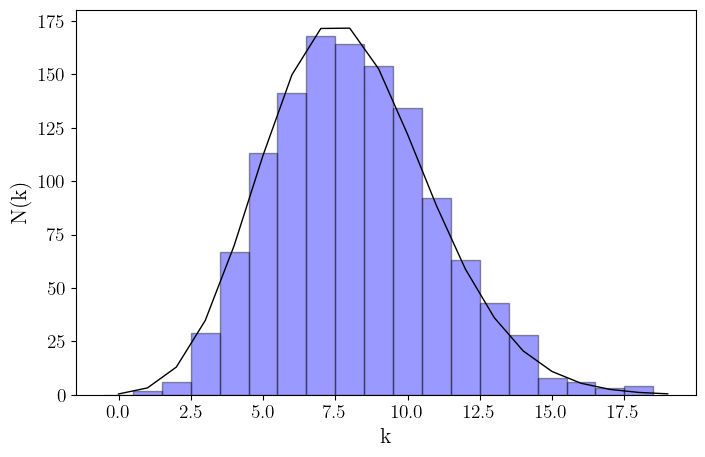

In [7]:
plt.xlabel(r"$\rm k$")
plt.ylabel(r'$\rm N(k)$')
plt.hist(degree_sequence,bins=range(0,int(maxk+2),1), align="left", histtype='bar', color="blue", alpha=0.4, edgecolor="black");
plt.plot(range(0,int(maxk+2),1),np.array(P(N,0,int(maxk+2),p))*N, linewidth=1, linestyle='-', c="black");

Nun werden wir das Koordinationspiel auf diesem zufälligen Netzwerk spielen:

In [8]:
params = {
    'figure.figsize'    : [10,4.5],
    'text.usetex'       : True,
    'axes.titlesize' : 14,
    'axes.labelsize' : 16,  
    'xtick.labelsize' : 14 ,
    'ytick.labelsize' : 14 
}
matplotlib.rcParams.update(params) 

In [9]:
Nx=35
Ny=35
N=int(Nx*Ny)
kbar=8
p=kbar/(N-1)
mink=0
while mink<1:
    G = nx.erdos_renyi_graph(N, p)
    degree_sequence = []
    for i in G.nodes():
        degree_sequence.append(G.degree(i))
    mink=min(degree_sequence)
    maxk=max(degree_sequence)

x0=0.6
Nit=11
PropPlayers=np.zeros([N,10])
AverageStratPlayers=np.zeros([Nit+1,2])
for it in range(1,Nit+1):
    AverageStratPlayers[it].flat[0] = -1

k=0
ColorPlayer=[]
for i in range(0,Nx):
    for j in range(0,Ny):
        G.add_node(k)
        PropPlayers[k].flat[0] = k #Knotennummer
        PropPlayers[k].flat[1] = i #x-Koordinate auf dem 2-D Gitter
        PropPlayers[k].flat[2] = j #y-Koordinate auf dem 2-D Gitter
        strategy=uniform(0, 100)#Zufaellige Strategienwahl 
        if strategy>=x0*100:
            PropPlayers[k].flat[3]=0 #entspricht Strategie s_2
            ColorPlayer.append("red")
        else:
            PropPlayers[k].flat[3]=1 #entspricht Strategie s_1
            ColorPlayer.append("blue")
        k=k+1

tval = np.linspace(0, Nit, 1001)
cmap = plt.cm.Blues 
numx0 = 30
line_colors = cmap(np.linspace(0,1,numx0+10))
x0=np.linspace(0.01,0.99,numx0)

fig = plt.figure()
gs = gridspec.GridSpec(1, 2, width_ratios=[1,1], wspace=0.3)
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])

j = 0
while j < numx0:
    Loes = integrate.odeint(DGL, x0[j], tval)
    ax1.plot(tval,Loes,c=line_colors[j+5], linewidth=1.5, linestyle='-');
    j = j + 1 
ax1.set_ylabel(r"$\rm x(t)$")
ax1.set_xlabel(r"$\rm t$")
ax1.set_xlim(0,Nit-1)
ax1.set_ylim(0,1)

def init():   
    ax2.scatter(PropPlayers[:,1],PropPlayers[:,2],s=30,c=ColorPlayer,marker="s",alpha=1,edgecolor='none')
    ax2.set_xlim(-0.75, Nx-0.25)
    ax2.set_ylim(-0.75, Ny-0.25)
    ax2.set_ylabel(r"$\rm y$")
    ax2.set_xlabel(r"$\rm x$")
    AverageStratPlayers[0].flat[0]=np.sum(PropPlayers[:,3])/N
    ax1.scatter(0,AverageStratPlayers[0,0], alpha=1, c="black",marker="o",s=50)
    return fig,

def animate(i):
    ax2.cla()
    for games in list(G.edges):
        PropPlayers[games[0]].flat[4] = Dollar(PropPlayers[games[0],3],PropPlayers[games[1],3]) + PropPlayers[games[0],4] 
        PropPlayers[games[1]].flat[4] = Dollar(PropPlayers[games[1],3],PropPlayers[games[0],3]) + PropPlayers[games[1],4] 
    for n in range(0,N):
        PropPlayers[n].flat[5]=PropPlayers[n,3]
        maxpayoff=PropPlayers[n,4]/G.degree(n)
        for neig in list(G.neighbors(n)):
            if PropPlayers[neig,4]/G.degree(neig) > PropPlayers[n,4]/G.degree(n) and PropPlayers[neig,4]/G.degree(neig) > maxpayoff:
                maxpayoff = PropPlayers[neig,4]/G.degree(neig)
                PropPlayers[n].flat[5] = PropPlayers[neig,3]
    ColorPlayernew=[]
    ColorPlayer=[]
    for n in range(0,N):
        if PropPlayers[n,5]==0:
            ColorPlayernew.append("red")
        if PropPlayers[n,5]==1:
            ColorPlayernew.append("blue")
        if PropPlayers[n,3]==0:
            ColorPlayer.append("red")
        if PropPlayers[n,3]==1:
            ColorPlayer.append("blue") 
        PropPlayers[n].flat[3] = PropPlayers[n,5]
        PropPlayers[n].flat[4] = 0
    AverageStratPlayers[i+1].flat[0]=np.sum(PropPlayers[:,3])/N
    ax1.plot(range(0,i+1,1),AverageStratPlayers[0:i+1,0], linewidth=1, linestyle='-', alpha=1, c="black")
    ax2.scatter(PropPlayers[:,1],PropPlayers[:,2],s=30,c=ColorPlayer,marker="s",alpha=1,edgecolor='none')
    ColorPlayer=ColorPlayernew
    return fig,

ani = animation.FuncAnimation(fig,animate,init_func=init,frames=Nit,interval=700)

plt.close(ani._fig)

HTML(ani.to_html5_video())

In dieser willkürlichen räumlichen Darstellung erkennt man den Grund der Strategienwahl der einzelnen Spieler nicht. Wir stellen nun das evolutionäre Spiel auf dem zufälligen Netzwerk im Fruchterman Reingold Layout dar ($N=20 \cdot 20 = 400$).

In [10]:
Nx=25
Ny=25
N=int(Nx*Ny)
kbar=8
p=kbar/(N-1)
mink=0
while mink<1:
    G = nx.erdos_renyi_graph(N, p)
    degree_sequence = []
    for i in G.nodes():
        degree_sequence.append(G.degree(i))
    mink=min(degree_sequence)
    maxk=max(degree_sequence)

x0=0.6
Nit=11
PropPlayers=np.zeros([N,10])
AverageStratPlayers=np.zeros([Nit+1,2])
for it in range(1,Nit+1):
    AverageStratPlayers[it].flat[0] = -1

pos2d=nx.fruchterman_reingold_layout(G,dim=2)

k=0
ColorPlayer=[]
for i in range(0,Nx):
    for j in range(0,Ny):
        G.add_node(k)
        PropPlayers[k].flat[0] = k #Knotennummer
        PropPlayers[k].flat[1] = pos2d[k][0] #x-Koordinate auf dem 2-D Gitter
        PropPlayers[k].flat[2] = pos2d[k][1] #y-Koordinate auf dem 2-D Gitter
        strategy=uniform(0, 10000)#Zufaellige Strategienwahl 
        if strategy>=x0*10000:
            PropPlayers[k].flat[3]=0 #entspricht Strategie s_2
            ColorPlayer.append("red")
        else:
            PropPlayers[k].flat[3]=1 #entspricht Strategie s_1
            ColorPlayer.append("blue")
        k=k+1

tval = np.linspace(0, Nit, 1001)
cmap = plt.cm.Blues 
numx0 = 30
line_colors = cmap(np.linspace(0,1,numx0+10))
x0=np.linspace(0.01,0.99,numx0)

fig = plt.figure()
gs = gridspec.GridSpec(1, 2, width_ratios=[1,1], wspace=0.3)
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])

j = 0
while j < numx0:
    Loes = integrate.odeint(DGL, x0[j], tval)
    ax1.plot(tval,Loes,c=line_colors[j+5], linewidth=1.5, linestyle='-');
    j = j + 1 
ax1.set_ylabel(r"$\rm x(t)$")
ax1.set_xlabel(r"$\rm t$")
ax1.set_xlim(0,Nit-1)
ax1.set_ylim(0,1)

def init():   
    ax2.scatter(PropPlayers[:,1],PropPlayers[:,2],s=30,c=ColorPlayer,marker="s",alpha=1,edgecolor='none')
    ax2.set_xlim(-0.75, Nx-0.25)
    ax2.set_ylim(-0.75, Ny-0.25)
    ax2.set_ylabel(r"$\rm y$")
    ax2.set_xlabel(r"$\rm x$")
    AverageStratPlayers[0].flat[0]=np.sum(PropPlayers[:,3])/N
    ax1.scatter(0,AverageStratPlayers[0,0], alpha=1, c="black",marker="o",s=50)
    return fig,

def animate(i):
    ax2.cla()
    for games in list(G.edges):
        ax2.plot([pos2d[games[0]][0],pos2d[games[1]][0]], [pos2d[games[0]][1],pos2d[games[1]][1]], alpha=0.3, linewidth=0.1, c="black")
        PropPlayers[games[0]].flat[4] = Dollar(PropPlayers[games[0],3],PropPlayers[games[1],3]) + PropPlayers[games[0],4] 
        PropPlayers[games[1]].flat[4] = Dollar(PropPlayers[games[1],3],PropPlayers[games[0],3]) + PropPlayers[games[1],4] 
    for n in range(0,N):
        PropPlayers[n].flat[5]=PropPlayers[n,3]
        maxpayoff=PropPlayers[n,4]/G.degree(n)
        for neig in list(G.neighbors(n)):
            if PropPlayers[neig,4]/G.degree(neig) > PropPlayers[n,4]/G.degree(neig) and PropPlayers[neig,4]/G.degree(neig) > maxpayoff:
                maxpayoff = PropPlayers[neig,4]/G.degree(n)
                PropPlayers[n].flat[5] = PropPlayers[neig,3]
    ColorPlayernew=[]
    ColorPlayer=[]
    for n in range(0,N):
        if PropPlayers[n,5]==0:
            ColorPlayernew.append("red")
        if PropPlayers[n,5]==1:
            ColorPlayernew.append("blue")
        if PropPlayers[n,3]==0:
            ColorPlayer.append("red")
        if PropPlayers[n,3]==1:
            ColorPlayer.append("blue") 
        PropPlayers[n].flat[3] = PropPlayers[n,5]
        PropPlayers[n].flat[4] = 0
    AverageStratPlayers[i+1].flat[0]=np.sum(PropPlayers[:,3])/N
    ax1.plot(range(0,i+1,1),AverageStratPlayers[0:i+1,0], linewidth=1, linestyle='-', alpha=1, c="black")
    ax2.scatter(PropPlayers[:,1],PropPlayers[:,2],s=16,c=ColorPlayer,marker="o",alpha=1,edgecolor='none')
    ColorPlayer=ColorPlayernew
    return fig,

ani = animation.FuncAnimation(fig,animate,init_func=init,frames=Nit,interval=700)

plt.close(ani._fig)

HTML(ani.to_html5_video())

Die Simulationen auf dem zufälligen Netzwerk zeigen für kleine Zeiten eine gute Übereinstimmung mit den Vorhersagen der klassischen Spieltheorie und die Anzahl der Spieler, die die Strategie 1 (blau) wählen, steigt mit der Zeit an. Jedoch strebt für große Zeiten der Wert der simulierten Populationsfunktion $x^{\tiny \rm Rand}(t)$ oft nicht gegen Eins und es bleibt die rote Strategie in einer Teilmenge der Spieler vorhanden. Um dies näher zu untersuchen, betrachten wir uns die Spielerstruktur des evolutionären Spiels am Ende der Simulation im Detail und reduzieren die Anzahl der Spieler ($N=100$) und der Spielerverbindungen ($<\! k \!>=5$) um mehr Übersicht zu erhalten.

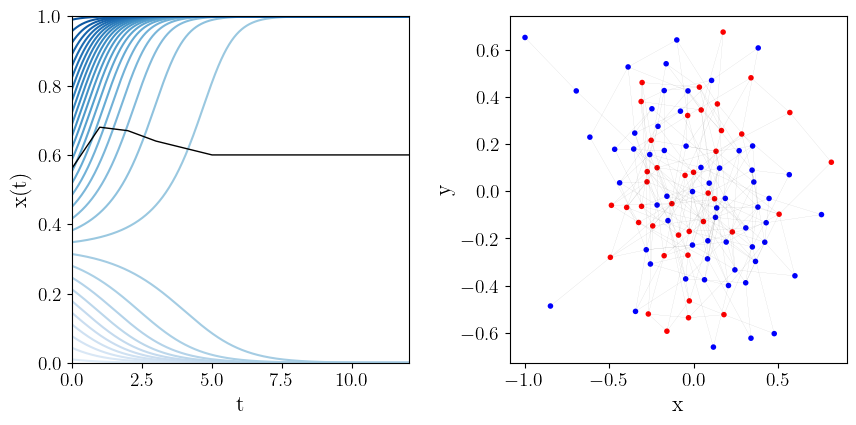

In [11]:
Nx=10
Ny=10
N=int(Nx*Ny)
kbar=5
p=kbar/(N-1)
mink=0
while mink<1:
    G = nx.erdos_renyi_graph(N, p)
    degree_sequence = []
    for i in G.nodes():
        degree_sequence.append(G.degree(i))
    mink=min(degree_sequence)
    maxk=max(degree_sequence)
x0=0.6
Nit=13
PropPlayers=np.zeros([N,10])
AverageStratPlayers=np.zeros([Nit+1,2])
NetworkState=np.zeros([Nit+1,N,5])
for it in range(1,Nit+1):
    AverageStratPlayers[it].flat[0] = -1

pos2d=nx.fruchterman_reingold_layout(G,dim=2)

k=0
ColorPlayer=[]
for i in range(0,Nx):
    for j in range(0,Ny):
        G.add_node(k)
        PropPlayers[k].flat[0] = k #Knotennummer
        PropPlayers[k].flat[1] = pos2d[k][0] #x-Koordinate auf dem 2-D Gitter
        PropPlayers[k].flat[2] = pos2d[k][1] #y-Koordinate auf dem 2-D Gitter
        strategy=uniform(0, 1000)#Zufaellige Strategienwahl 
        if strategy>=x0*1000:
            PropPlayers[k].flat[3]=0 #entspricht Strategie s_2
            ColorPlayer.append("red")
        else:
            PropPlayers[k].flat[3]=1 #entspricht Strategie s_1
            ColorPlayer.append("blue")
        k=k+1

tval = np.linspace(0, Nit, 1001)
cmap = plt.cm.Blues 
numx0 = 30
line_colors = cmap(np.linspace(0,1,numx0+10))
x0=np.linspace(0.01,0.99,numx0)

fig = plt.figure()
gs = gridspec.GridSpec(1, 2, width_ratios=[1,1], wspace=0.3)
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])

j = 0
while j < numx0:
    Loes = integrate.odeint(DGL, x0[j], tval)
    ax1.plot(tval,Loes,c=line_colors[j+5], linewidth=1.5, linestyle='-');
    j = j + 1 
ax1.set_ylabel(r"$\rm x(t)$")
ax1.set_xlabel(r"$\rm t$")
ax1.set_xlim(0,Nit-1)
ax1.set_ylim(0,1)

AverageStratPlayers[0].flat[0]=np.sum(PropPlayers[:,3])/N

for i in range(0,Nit):
    for games in list(G.edges):
        PropPlayers[games[0]].flat[4] = Dollar(PropPlayers[games[0],3],PropPlayers[games[1],3]) + PropPlayers[games[0],4] 
        PropPlayers[games[1]].flat[4] = Dollar(PropPlayers[games[1],3],PropPlayers[games[0],3]) + PropPlayers[games[1],4] 

    for n in range(0,N):
        NetworkState[i][n].flat[0]=PropPlayers[n,3]
        NetworkState[i][n].flat[1]=PropPlayers[n,4]
        NetworkState[i][n].flat[2]=PropPlayers[n,4]/G.degree(n)
        PropPlayers[n,6]=PropPlayers[n,4]/G.degree(n)
        PropPlayers[n].flat[5]=PropPlayers[n,3]
        maxpayoff=PropPlayers[n,4]/G.degree(n)
        for neig in list(G.neighbors(n)):
            if PropPlayers[neig,4]/G.degree(neig) > PropPlayers[n,4]/G.degree(n) and PropPlayers[neig,4]/G.degree(neig) > maxpayoff:
                maxpayoff = PropPlayers[neig,4]/G.degree(neig)
                PropPlayers[n].flat[5] = PropPlayers[neig,3]
        NetworkState[i][n].flat[3]=maxpayoff
    ColorPlayernew=[]
    ColorPlayer=[]
    for n in range(0,N):
        if PropPlayers[n,5]==0:
            ColorPlayernew.append("red")
        if PropPlayers[n,5]==1:
            ColorPlayernew.append("blue")
        if PropPlayers[n,3]==0:
            ColorPlayer.append("red")
        if PropPlayers[n,3]==1:
            ColorPlayer.append("blue") 
        NetworkState[i][n].flat[4]=PropPlayers[n,5]
        PropPlayers[n].flat[3] = PropPlayers[n,5]
        PropPlayers[n].flat[4] = 0
    AverageStratPlayers[i+1].flat[0]=np.sum(PropPlayers[:,3])/N

ax1.plot(range(0,Nit,1),AverageStratPlayers[0:Nit,0], linewidth=1, linestyle='-', alpha=1, c="black")
ax2.scatter(PropPlayers[:,1],PropPlayers[:,2],s=16,c=ColorPlayer,marker="o",alpha=1,edgecolor='none')
for games in list(G.edges):
    ax2.plot([pos2d[games[0]][0],pos2d[games[1]][0]], [pos2d[games[0]][1],pos2d[games[1]][1]], alpha=0.3, linewidth=0.1, c="black")

ax2.set_ylabel(r"$\rm y$")
ax2.set_xlabel(r"$\rm x$");

Die obige Abbildung stellt das letzte Bild des simulierten evolutionären Spiels auf dem zufälligen Netzwerk dar. Die rechte Abbildung ist ein wenig unübersichtlich und man erkennt nicht deutlich wie die Spielerverbindung der verbliebenen roten Knoten untereinander ist. Wir betrachten uns deshalb den simulierten Endzustand genauer und separieren die roten Spieler von den Blauen.

In [12]:
import plotly.graph_objects as go

In [13]:
pos3d=nx.fruchterman_reingold_layout(G,dim=3)

In [14]:
iter=Nit-2
for k in range(N):
    PropPlayers[k,7]=0#shiftx=0
    PropPlayers[k,8]=0#shifty=0
    PropPlayers[k,9]=0#shiftz=0
ColorPlayer=[]
for k in range(N):
    if NetworkState[iter,k,0]==0:
        ColorPlayer.append("red")
        PropPlayers[k,9]=PropPlayers[k,9]+3
        for neigh in G.neighbors(k):
            if NetworkState[iter,neigh,0]==1:
                PropPlayers[neigh,7]=PropPlayers[neigh,7]+2
                PropPlayers[neigh,9]=PropPlayers[neigh,9]+0.5
    else:
        ColorPlayer.append("blue")        
    if NetworkState[iter,k,0]!=NetworkState[iter+1,k,0]:
        PropPlayers[k,8]=PropPlayers[k,8]+4
#node_z=[pos3d[k][2] for k in range(N)]

node_x=[pos3d[k][0]+PropPlayers[k,7] for k in range(N)]
node_y=[pos3d[k][1]+PropPlayers[k,8] for k in range(N)]
node_z=[pos3d[k][2]+PropPlayers[k,9] for k in range(N)]

edge_x = []
edge_y = []
edge_z = []
for edge in G.edges():
    edge_x+=[node_x[edge[0]],node_x[edge[1]], None]
    edge_y+=[node_y[edge[0]],node_y[edge[1]], None]
    edge_z+=[node_z[edge[0]],node_z[edge[1]], None]
labels=[]
group=[]
for node in range(N):
    payoffNode=NetworkState[iter,node,2].round(3)
    stratnode=NetworkState[iter,node,0]
    stratnodenew=NetworkState[iter+1,node,0]
    maxpayoffneigh=NetworkState[iter,node,3].round(3)
    labels.append('Knoten '+str(node)+', Strat = '+str(stratnode)+', MaxPay.Neigh = '+str(maxpayoffneigh)+', Payoff = '+str(payoffNode)+', Strat New= '+str(stratnodenew))
    group.append(degree_sequence[node])


edge_trace=go.Scatter3d(x=edge_x,
               y=edge_y,
               z=edge_z,
               mode='lines',
               line=dict(color='black', width=0.8),
               hoverinfo='none'
               )

node_trace=go.Scatter3d(x=node_x,
               y=node_y,
               z=node_z,
               mode='markers',
               name='actors',
               marker=dict(symbol='circle',
                             size=6,
                             color=ColorPlayer,
#                             colorscale='YlGnBu',
                             line=dict(color='black', width=0.8)
                             ),
               text=labels,
               opacity=0.9,
               hoverinfo='text'
               )
axis=dict(showbackground=False,
          backgroundcolor="white",
          showline=False,
          zeroline=False,
          showgrid=True,
          gridcolor="rgb(244, 233, 245)",
          showticklabels=False,
          showaxeslabels=False,
          )

layout = go.Layout(
         width=700,
         height=700,
         showlegend=False,
         scene=dict(
             xaxis=dict(axis),
             yaxis=dict(axis),
             zaxis=dict(axis),
        ),
    margin=dict(b=20,l=10,r=10,t=10),
    hovermode='closest',
   )
data=[node_trace,edge_trace]
fig=go.Figure(data=data, layout=layout)
fig.show(renderer='iframe')

Die obere Abbildung zeigt das Netzwerk bei einer festgelegten Zeititeration. Die roten Spieler sind um einen gewissen Betrag in z-Richtung verschoben, die Nachbarn der roten Spieler um einen gewissen Betrag in xz-Richtung und Spieler, die ihre Strategie in der nächsten Spielperiode verändern, sind um einen gewissen Betrag in y-Richtung verschoben (in der oberen Abbildung tritt diese Situation aufgrund des statischen Endzustandes jedoch nicht auf). Zusätzlich kann man in der interaktiven Grafik die Knotennummer, die aktuelle und zukünftige Strategie, den erzielten Payoff und den maximalen Payoff der Nachbarn erkennen, wenn man mit der Maus in die Nähe eines Knotens gelangt. Die einzelnen Eigenschaften des Knotens und seiner Nachbarn können auch wie folgt ausgegeben werden:

In [15]:
iter=Nit-2
seln=17
print("Spieler Nr.: ",seln)
print("Strategie: ",NetworkState[iter][seln][0])
print("Zukunft Strategie: ",NetworkState[iter][seln][4])
print("AnzNachbarn: ",G.degree(seln))
print("Auszahlung Ges.: ",NetworkState[iter][seln][1])
print("Auszahlung Durchschn.: ",NetworkState[iter][seln][2])

for neig in list(G.neighbors(seln)):
    print("-------------")
    print("Nachbar Nr.: ",neig)
    print("Strat. Nachb: ",NetworkState[iter][neig][0])
    print("Auszahlung Nachb: ",NetworkState[iter][neig][2])
print(NetworkState[iter][seln][0],NetworkState[iter][seln][1],NetworkState[iter][seln][2],NetworkState[iter][seln][3],NetworkState[iter][seln][4])

Spieler Nr.:  17
Strategie:  1.0
Zukunft Strategie:  1.0
AnzNachbarn:  7
Auszahlung Ges.:  22.0
Auszahlung Durchschn.:  3.142857142857143
-------------
Nachbar Nr.:  2
Strat. Nachb:  1.0
Auszahlung Nachb:  3.4
-------------
Nachbar Nr.:  9
Strat. Nachb:  1.0
Auszahlung Nachb:  3.25
-------------
Nachbar Nr.:  33
Strat. Nachb:  1.0
Auszahlung Nachb:  3.2
-------------
Nachbar Nr.:  37
Strat. Nachb:  1.0
Auszahlung Nachb:  3.3333333333333335
-------------
Nachbar Nr.:  61
Strat. Nachb:  1.0
Auszahlung Nachb:  3.2857142857142856
-------------
Nachbar Nr.:  88
Strat. Nachb:  0.0
Auszahlung Nachb:  2.142857142857143
-------------
Nachbar Nr.:  92
Strat. Nachb:  1.0
Auszahlung Nachb:  3.2857142857142856
1.0 22.0 3.142857142857143 3.4 1.0


Die zufällig erzeugte Gruppenstruktur des zufälligen Netzwerkes ermöglichte es, dass sich bei Koordinationsspielen einzelne Strategieinseln herausbilden konnten, in denen die rote Strategie als Vorteilhaft angesehen wird.

Nun soll das zugrundeliegende Spieler-Netzwerk ein vollständig verbundenes Netzwerk sein. Wir erzeugen dafür wieder das entsprechende vollständig verbundene Kontakt-Netzwerk mit $N=35\cdot35=1225$ Personen, wobei wir in jedem Iterationsschritt jeden Spieler mit acht seinen Nachbarn das Spiel spielen lassen ($<\! k \!>_{\rm eff} \approx 8$).

In [16]:
Nx=35
Ny=35
N=int(Nx*Ny)
kbar=8
p=1
G = nx.erdos_renyi_graph(N, p)
degree_sequence = []
for i in G.nodes():
    degree_sequence.append(G.degree(i))
mink=min(degree_sequence)
maxk=max(degree_sequence)

x0=0.6
Nit=11
PropPlayers=np.zeros([N,10])
AverageStratPlayers=np.zeros([Nit+1,2])
for it in range(1,Nit+1):
    AverageStratPlayers[it].flat[0] = -1

NeighPlayers=np.zeros([N+1,10])
    
k=0
ColorPlayer=[]
for i in range(0,Nx):
    for j in range(0,Ny):
        PropPlayers[k].flat[0] = k #Knotennummer
        PropPlayers[k].flat[1] = i #x-Koordinate auf dem 2-D Gitter
        PropPlayers[k].flat[2] = j #y-Koordinate auf dem 2-D Gitter
        strategy=uniform(0, 1000)#Zufaellige Strategienwahl 
        if strategy>=x0*1000:
            PropPlayers[k].flat[3]=0 #entspricht Strategie s_2
            ColorPlayer.append("red")
        else:
            PropPlayers[k].flat[3]=1 #entspricht Strategie s_1
            ColorPlayer.append("blue")
        k=k+1

tval = np.linspace(0, Nit, 1001)
cmap = plt.cm.Blues 
numx0 = 30
line_colors = cmap(np.linspace(0,1,numx0+10))
x0=np.linspace(0.01,0.99,numx0)

fig = plt.figure()
gs = gridspec.GridSpec(1, 2, width_ratios=[1,1], wspace=0.3)
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])

j = 0
while j < numx0:
    Loes = integrate.odeint(DGL, x0[j], tval)
    ax1.plot(tval,Loes,c=line_colors[j+5], linewidth=1.5, linestyle='-');
    j = j + 1 
ax1.set_ylabel(r"$\rm x(t)$")
ax1.set_xlabel(r"$\rm t$")
ax1.set_xlim(0,Nit-1)
ax1.set_ylim(0,1)

def init():  
    ax2.scatter(PropPlayers[:,1],PropPlayers[:,2],s=30,c=ColorPlayer,marker="s",alpha=1,edgecolor='none')
    ax2.set_xlim(-0.75, Nx-0.25)
    ax2.set_ylim(-0.75, Ny-0.25)
    ax2.set_ylabel(r"$\rm y$")
    ax2.set_xlabel(r"$\rm x$")
    AverageStratPlayers[0].flat[0]=np.sum(PropPlayers[:,3])/N
    ax1.scatter(0,AverageStratPlayers[0,0], alpha=1, c="black",marker="o",s=50)
    return fig,

def animate(i):
    ax2.cla()
    for n in range(0,N):
        for neigh in range(0,10):
            NeighPlayers[n].flat[neigh]=0
            
#    print("It:",i)
    NLinks=0
    for n in range(1,N):
        kneigh=NeighPlayers[n,0]
#        print("NLinks:",NLinks)
#        print("Nalt:",n,NeighPlayers[n,:])
        if NLinks < int(N*(kbar)/2)-kbar:
            while kneigh < kbar:
                setneigh=list(G.neighbors(n))[randint(0, len(list(G.neighbors(n)))-1)]
                if setneigh != n and NeighPlayers[setneigh,0]<=kbar and setneigh not in NeighPlayers[n,1:int(NeighPlayers[n,0])+1] and n not in NeighPlayers[setneigh,1:int(NeighPlayers[setneigh,0])+1]:
                    NeighPlayers[n].flat[int(kneigh+1)]=setneigh
                    NeighPlayers[setneigh].flat[int(NeighPlayers[setneigh,0]+1)]=n
                    NeighPlayers[n].flat[0]=NeighPlayers[n,0]+1
                    NeighPlayers[setneigh].flat[0]=NeighPlayers[setneigh,0]+1
                    PropPlayers[n].flat[4] = Dollar(PropPlayers[n,3],PropPlayers[setneigh,3]) + PropPlayers[n,4] 
                    PropPlayers[setneigh].flat[4] = Dollar(PropPlayers[setneigh,3],PropPlayers[n,3]) + PropPlayers[setneigh,4]               
                    kneigh=kneigh+1
                    NLinks=NLinks+1
#        print("N:",n,NeighPlayers[n,:])
#        print("Neff:",NLinks/N)
#    print("N0:",0,NeighPlayers[0,:])
#    print("End1:")
    for n in range(0,N):
        PropPlayers[n].flat[5]=PropPlayers[n,3]
        maxpayoff=PropPlayers[n,4]
        for neig in list(NeighPlayers[n,1:]):
            if PropPlayers[int(neig),4] > PropPlayers[n,4] and PropPlayers[int(neig),4] > maxpayoff:
                maxpayoff = PropPlayers[int(neig),4]
                PropPlayers[n].flat[5] = PropPlayers[int(neig),3]
    ColorPlayernew=[]
    ColorPlayer=[]
    for n in range(0,N):
        if PropPlayers[n,5]==0:
            ColorPlayernew.append("red")
        if PropPlayers[n,5]==1:
            ColorPlayernew.append("blue")
        if PropPlayers[n,3]==0:
            ColorPlayer.append("red")
        if PropPlayers[n,3]==1:
            ColorPlayer.append("blue") 
        PropPlayers[n].flat[3] = PropPlayers[n,5]
        PropPlayers[n].flat[4] = 0
    AverageStratPlayers[i+1].flat[0]=np.sum(PropPlayers[:,3])/N
    ax1.plot(range(0,i+1,1),AverageStratPlayers[0:i+1,0], linewidth=1, linestyle='-', alpha=1, c="black")
    ax2.scatter(PropPlayers[:,1],PropPlayers[:,2],s=30,c=ColorPlayer,marker="s",alpha=1,edgecolor='none')
    ColorPlayer=ColorPlayernew
    return fig,

ani = animation.FuncAnimation(fig,animate,init_func=init,frames=Nit,interval=700)

plt.close(ani._fig)

HTML(ani.to_html5_video())

Um die Vorhersagen der analytischen evolutionären Spieltheorie mit den simulierten Ergebnissen zu vergleichen, erzeugen wir 5 Simulationen mit 3 unterschiedlichen Anfangswerten $x(t=0)$ und stellen die simulierten Strategieentwicklungen der Population für zwei unterschiedliche Koordinationsspiele dar.

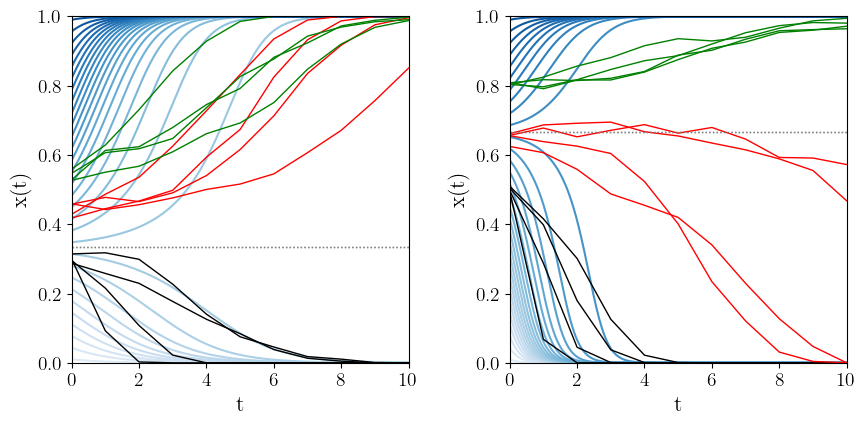

In [17]:
a,b,c,d = 3,4,1,5
Nx=35
Ny=35
N=int(Nx*Ny)
kbar=8
p=1
G = nx.erdos_renyi_graph(N, p)
degree_sequence = []
for i in G.nodes():
    degree_sequence.append(G.degree(i))
mink=min(degree_sequence)
maxk=max(degree_sequence)
Nensemble=4


tval = np.linspace(0, Nit, 1001)
cmap = plt.cm.Blues 
numx0 = 30
line_colors = cmap(np.linspace(0,1,numx0+10))
x0=np.linspace(0.01,0.99,numx0)

fig = plt.figure()
gs = gridspec.GridSpec(1, 2, width_ratios=[1,1], wspace=0.3)
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])

j = 0
while j < numx0:
    Loes = integrate.odeint(DGL, x0[j], tval)
    ax1.plot(tval,Loes,c=line_colors[j+5], linewidth=1.5, linestyle='-');
    j = j + 1 
ax1.set_ylabel(r"$\rm x(t)$")
ax1.set_xlabel(r"$\rm t$")
ax1.set_xlim(0,Nit-1)
ax1.set_ylim(0,1)

Nit=11
PropPlayers=np.zeros([N,10])
AverageStratPlayers=np.zeros([Nit+1,2])
for it in range(1,Nit+1):
    AverageStratPlayers[it].flat[0] = -1

NeighPlayers=np.zeros([N+1,10])

setx0=[0.3,0.42,0.54]
setcolorcurve=["black","red","green"]
cx0=0
    

for anfx0 in setx0:
    GemNash=(b-d)/(b+c-a-d)
#    print(GemNash)
    for ens in range(0,Nensemble):
        x0=anfx0
        k=0
        ColorPlayer=[]
        for i in range(0,Nx):
            for j in range(0,Ny):
                PropPlayers[k].flat[0] = k #Knotennummer
                PropPlayers[k].flat[1] = i #x-Koordinate auf dem 2-D Gitter
                PropPlayers[k].flat[2] = j #y-Koordinate auf dem 2-D Gitter
                strategy=uniform(0, 1000)#Zufaellige Strategienwahl 
                if strategy>=x0*1000:
                    PropPlayers[k].flat[3]=0 #entspricht Strategie s_2
                    ColorPlayer.append("red")
                else:
                    PropPlayers[k].flat[3]=1 #entspricht Strategie s_1
                    ColorPlayer.append("blue")
                k=k+1
        AverageStratPlayers[0].flat[0]=np.sum(PropPlayers[:,3])/N
        for i in range(0,Nit):
            for n in range(0,N):
                for neigh in range(0,10):
                    NeighPlayers[n].flat[neigh]=0
            
#            print("It:",i)
            NLinks=0
            for n in range(1,N):
                kneigh=NeighPlayers[n,0]
#                print("NLinks:",NLinks)
#                print("Nalt:",n,NeighPlayers[n,:])
                if NLinks < int(N*(kbar)/2)-kbar:
                    while kneigh < kbar:
                        setneigh=list(G.neighbors(n))[randint(0, len(list(G.neighbors(n)))-1)]
                        if setneigh != n and NeighPlayers[setneigh,0]<=kbar and setneigh not in NeighPlayers[n,1:int(NeighPlayers[n,0])+1] and n not in NeighPlayers[setneigh,1:int(NeighPlayers[setneigh,0])+1]:
                            NeighPlayers[n].flat[int(kneigh+1)]=setneigh
                            NeighPlayers[setneigh].flat[int(NeighPlayers[setneigh,0]+1)]=n
                            NeighPlayers[n].flat[0]=NeighPlayers[n,0]+1
                            NeighPlayers[setneigh].flat[0]=NeighPlayers[setneigh,0]+1
                            PropPlayers[n].flat[4] = Dollar(PropPlayers[n,3],PropPlayers[setneigh,3]) + PropPlayers[n,4] 
                            PropPlayers[setneigh].flat[4] = Dollar(PropPlayers[setneigh,3],PropPlayers[n,3]) + PropPlayers[setneigh,4]               
                            kneigh=kneigh+1
                            NLinks=NLinks+1
#                print("N:",n,NeighPlayers[n,:])
#                print("Neff:",NLinks/N)
#            print("N0:",0,NeighPlayers[0,:])
#            print("End1:")
            for n in range(0,N):
                PropPlayers[n].flat[5]=PropPlayers[n,3]
                maxpayoff=PropPlayers[n,4]
                for neig in list(NeighPlayers[n,1:]):
                    if PropPlayers[int(neig),4] > PropPlayers[n,4] and PropPlayers[int(neig),4] > maxpayoff:
                        maxpayoff = PropPlayers[int(neig),4]
                        PropPlayers[n].flat[5] = PropPlayers[int(neig),3]
            ColorPlayernew=[]
            ColorPlayer=[]
            for n in range(0,N):
                if PropPlayers[n,5]==0:
                    ColorPlayernew.append("red")
                if PropPlayers[n,5]==1:
                    ColorPlayernew.append("blue")
                if PropPlayers[n,3]==0:
                    ColorPlayer.append("red")
                if PropPlayers[n,3]==1:
                    ColorPlayer.append("blue") 
                PropPlayers[n].flat[3] = PropPlayers[n,5]
            PropPlayers[n].flat[4] = 0
            AverageStratPlayers[i+1].flat[0]=np.sum(PropPlayers[:,3])/N
            ColorPlayer=ColorPlayernew

#        print(x0,ens)
#        print(AverageStratPlayers[0:Nit,0])
        ax1.plot(range(0,Nit,1),AverageStratPlayers[0:Nit,0], linewidth=1, linestyle='-', alpha=1, c=setcolorcurve[cx0])
    ax1.plot([0,Nit],[GemNash,GemNash], linewidth=1, linestyle=':', alpha=0.7, c="grey")
    cx0=cx0+1



a,b,c,d = 3,4,1,8
Nx=35
Ny=35
N=int(Nx*Ny)
kbar=8
p=1
G = nx.erdos_renyi_graph(N, p)
degree_sequence = []
for i in G.nodes():
    degree_sequence.append(G.degree(i))
mink=min(degree_sequence)
maxk=max(degree_sequence)


tval = np.linspace(0, Nit, 1001)
cmap = plt.cm.Blues 
numx0 = 30
line_colors = cmap(np.linspace(0,1,numx0+10))
x0=np.linspace(0.01,0.99,numx0)

j = 0
while j < numx0:
    Loes = integrate.odeint(DGL, x0[j], tval)
    ax2.plot(tval,Loes,c=line_colors[j+5], linewidth=1.5, linestyle='-');
    j = j + 1 
ax2.set_ylabel(r"$\rm x(t)$")
ax2.set_xlabel(r"$\rm t$")
ax2.set_xlim(0,Nit-1)
ax2.set_ylim(0,1)

Nit=11
PropPlayers=np.zeros([N,10])
AverageStratPlayers=np.zeros([Nit+1,2])
for it in range(1,Nit+1):
    AverageStratPlayers[it].flat[0] = -1

NeighPlayers=np.zeros([N+1,10])

setx0=[0.5,0.63,0.8]
setcolorcurve=["black","red","green"]
cx0=0
    

for anfx0 in setx0:
    GemNash=(b-d)/(b+c-a-d)
    for ens in range(0,Nensemble):
        x0=anfx0
        k=0
        ColorPlayer=[]
        for i in range(0,Nx):
            for j in range(0,Ny):
                PropPlayers[k].flat[0] = k #Knotennummer
                PropPlayers[k].flat[1] = i #x-Koordinate auf dem 2-D Gitter
                PropPlayers[k].flat[2] = j #y-Koordinate auf dem 2-D Gitter
                strategy=uniform(0, 1000)#Zufaellige Strategienwahl 
                if strategy>=x0*1000:
                    PropPlayers[k].flat[3]=0 #entspricht Strategie s_2
                    ColorPlayer.append("red")
                else:
                    PropPlayers[k].flat[3]=1 #entspricht Strategie s_1
                    ColorPlayer.append("blue")
                k=k+1
        AverageStratPlayers[0].flat[0]=np.sum(PropPlayers[:,3])/N
        for i in range(0,Nit):
            for n in range(0,N):
                for neigh in range(0,10):
                    NeighPlayers[n].flat[neigh]=0
            
#            print("It:",i)
            NLinks=0
            for n in range(1,N):
                kneigh=NeighPlayers[n,0]
#                print("NLinks:",NLinks)
#                print("Nalt:",n,NeighPlayers[n,:])
                if NLinks < int(N*(kbar)/2)-kbar:
                    while kneigh < kbar:
                        setneigh=list(G.neighbors(n))[randint(0, len(list(G.neighbors(n)))-1)]
                        if setneigh != n and NeighPlayers[setneigh,0]<=kbar and setneigh not in NeighPlayers[n,1:int(NeighPlayers[n,0])+1] and n not in NeighPlayers[setneigh,1:int(NeighPlayers[setneigh,0])+1]:
                            NeighPlayers[n].flat[int(kneigh+1)]=setneigh
                            NeighPlayers[setneigh].flat[int(NeighPlayers[setneigh,0]+1)]=n
                            NeighPlayers[n].flat[0]=NeighPlayers[n,0]+1
                            NeighPlayers[setneigh].flat[0]=NeighPlayers[setneigh,0]+1
                            PropPlayers[n].flat[4] = Dollar(PropPlayers[n,3],PropPlayers[setneigh,3]) + PropPlayers[n,4] 
                            PropPlayers[setneigh].flat[4] = Dollar(PropPlayers[setneigh,3],PropPlayers[n,3]) + PropPlayers[setneigh,4]               
                            kneigh=kneigh+1
                            NLinks=NLinks+1
#                print("N:",n,NeighPlayers[n,:])
#                print("Neff:",NLinks/N)
#            print("N0:",0,NeighPlayers[0,:])
#            print("End1:")
            for n in range(0,N):
                PropPlayers[n].flat[5]=PropPlayers[n,3]
                maxpayoff=PropPlayers[n,4]
                for neig in list(NeighPlayers[n,1:]):
                    if PropPlayers[int(neig),4] > PropPlayers[n,4] and PropPlayers[int(neig),4] > maxpayoff:
                        maxpayoff = PropPlayers[int(neig),4]
                        PropPlayers[n].flat[5] = PropPlayers[int(neig),3]
            ColorPlayernew=[]
            ColorPlayer=[]
            for n in range(0,N):
                if PropPlayers[n,5]==0:
                    ColorPlayernew.append("red")
                if PropPlayers[n,5]==1:
                    ColorPlayernew.append("blue")
                if PropPlayers[n,3]==0:
                    ColorPlayer.append("red")
                if PropPlayers[n,3]==1:
                    ColorPlayer.append("blue") 
                PropPlayers[n].flat[3] = PropPlayers[n,5]
            PropPlayers[n].flat[4] = 0
            AverageStratPlayers[i+1].flat[0]=np.sum(PropPlayers[:,3])/N
            ColorPlayer=ColorPlayernew
#        print(x0,ens)
#        print(AverageStratPlayers[0:Nit,0])
        ax2.plot(range(0,Nit,1),AverageStratPlayers[0:Nit,0], linewidth=1, linestyle='-', alpha=1, c=setcolorcurve[cx0])
    ax2.plot([0,Nit],[GemNash,GemNash], linewidth=1, linestyle=':', alpha=0.7, c="grey")
    cx0=cx0+1

Die oberen Abbildungen zeigen die simulierten Ergebnisse für zwei Koordinationsspiele mit unterschiedlichem gemischten Nash-Gleichgewicht (siehe graue gepunktete Linien). Die simulierten Populationsvektoren (siehe schwarze, rote und grüne Kurven) stimmen gut mit den Vorhersagen der analytischen evolutionären Spieltheorie überein, wobei die Form der zeitlichen Entwicklung stark vom Zufall bestimmt ist. 

Das oben abgebildete evolutionäre Spiel eines Koordinationsspiels auf einem vollständig verbundenen Netzwerk, in dem jeder Spieler pro Spielperiode acht Spielpartner sucht und mit ihnen das Spiel spielt ($<\! k \!>_{\rm eff} \approx 8$) wird nun durch ein Anti-Koordinationsspiel ersetzt.

### Die Klasse der Anti-Koordinationsspiele ( a < c und b > d )

#### Wiederholung aus Teil I: 

Ein Anti-Koordinationsspiel existiert, falls die Parameter a, b, c und d der Auszahlungsmatrix die folgenden Bedingungen erfüllen: a < c und b > d . Bei dieser Spielklasse existieren drei Nash-Gleichgewichte, ein gemischtes Nash-Gleichgewicht und zwei reine, unsymmetrische Nash-Gleichgewicht bei (x,y)=(0,1) und (x,y)=(0,1). 

Unabhängig von der gewählten Anfangszusammensetzung der Population entwickelt sich die Strategienwahl der Population zu einem Zustand der Koexistenz beider Strategien, wobei die für große Zeiten asymptotisch erreichte Population-Zusammensetzung durch den Wert des internen gemischten Nash-Gleichgewichts $x^\star$ gegeben ist und die evolutionär stabile Strategie des Spiels darstellt. Wieder lässt sich der Wert des gemischten Nash-Gleichgewichts durch Berechnung der internen Nullstelle der Funktion g(x) ermitteln ($g(x^\star)=0$).

Wir legen zunächst die Auszahlungsmatrix des Koordinationsspiels fest und definieren so die gemischte Auszahlungsfunktion ${\bf \tilde{\cal \$}}(x,y)$ der Spieler im Anti-Koordinationsspiel. 

Um die Vorhersagen der analytischen evolutionären Spieltheorie mit den simulierten Ergebnissen zu vergleichen, erzeugen wir wieder 5 Simulationen mit 3 unterschiedlichen Anfangswerten $x(t=0)$ und stellen die simulierten Strategieentwicklungen der Population für zwei unterschiedliche Anti-Koordinationsspiele dar:

Linke Abbildung: 
$   \hat{\bf {\cal \$}}=
  \left( {\begin{array}{cc}
   1 & 6 \\
   2 & 3 \\
  \end{array} } \right) \quad,\qquad
$
Rechte Abbildung: 
$   \hat{\bf {\cal \$}}=
  \left( {\begin{array}{cc}
   1 & 4 \\
   2 & 3 \\
  \end{array} } \right) \qquad.$

Wieder spielen wir das Spiel auf einem vollständigen verbundenen Netzwerk, in dem jeder Spieler pro Spielperiode acht Spielpartner sucht und mit ihnen das Spiel spielt ($<\! k \!>_{\rm eff} \approx 8$).

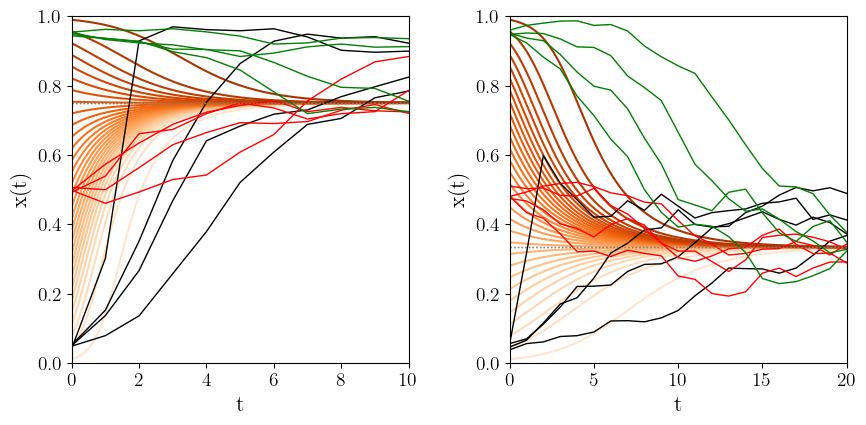

In [18]:
a,b,c,d = 1,6,2,3
Nx=35
Ny=35
N=int(Nx*Ny)
kbar=8
p=1
G = nx.erdos_renyi_graph(N, p)
degree_sequence = []
for i in G.nodes():
    degree_sequence.append(G.degree(i))
mink=min(degree_sequence)
maxk=max(degree_sequence)
Nensemble=4


tval = np.linspace(0, Nit, 1001)
cmap = plt.cm.Oranges 
numx0 = 30
line_colors = cmap(np.linspace(0,1,numx0+10))
x0=np.linspace(0.01,0.99,numx0)

fig = plt.figure()
gs = gridspec.GridSpec(1, 2, width_ratios=[1,1], wspace=0.3)
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])

j = 0
while j < numx0:
    Loes = integrate.odeint(DGL, x0[j], tval)
    ax1.plot(tval,Loes,c=line_colors[j+5], linewidth=1.5, linestyle='-');
    j = j + 1 
ax1.set_ylabel(r"$\rm x(t)$")
ax1.set_xlabel(r"$\rm t$")
ax1.set_xlim(0,Nit-1)
ax1.set_ylim(0,1)

Nit=21
PropPlayers=np.zeros([N,10])
AverageStratPlayers=np.zeros([Nit+1,2])
for it in range(1,Nit+1):
    AverageStratPlayers[it].flat[0] = -1

NeighPlayers=np.zeros([N+1,10])

setx0=[0.05,0.5,0.95]
setcolorcurve=["black","red","green"]
cx0=0
    

for anfx0 in setx0:
    GemNash=(b-d)/(b+c-a-d)
#    print(GemNash)
    for ens in range(0,Nensemble):
        x0=anfx0
        k=0
        ColorPlayer=[]
        for i in range(0,Nx):
            for j in range(0,Ny):
                PropPlayers[k].flat[0] = k #Knotennummer
                PropPlayers[k].flat[1] = i #x-Koordinate auf dem 2-D Gitter
                PropPlayers[k].flat[2] = j #y-Koordinate auf dem 2-D Gitter
                strategy=uniform(0, 1000)#Zufaellige Strategienwahl 
                if strategy>=x0*1000:
                    PropPlayers[k].flat[3]=0 #entspricht Strategie s_2
                    ColorPlayer.append("red")
                else:
                    PropPlayers[k].flat[3]=1 #entspricht Strategie s_1
                    ColorPlayer.append("blue")
                k=k+1
        AverageStratPlayers[0].flat[0]=np.sum(PropPlayers[:,3])/N
        for i in range(0,Nit):
            for n in range(0,N):
                for neigh in range(0,10):
                    NeighPlayers[n].flat[neigh]=0
            
#            print("It:",i)
            NLinks=0
            for n in range(1,N):
                kneigh=NeighPlayers[n,0]
#                print("NLinks:",NLinks)
#                print("Nalt:",n,NeighPlayers[n,:])
                if NLinks < int(N*(kbar)/2)-kbar:
                    while kneigh < kbar:
                        setneigh=list(G.neighbors(n))[randint(0, len(list(G.neighbors(n)))-1)]
                        if setneigh != n and NeighPlayers[setneigh,0]<=kbar and setneigh not in NeighPlayers[n,1:int(NeighPlayers[n,0])+1] and n not in NeighPlayers[setneigh,1:int(NeighPlayers[setneigh,0])+1]:
                            NeighPlayers[n].flat[int(kneigh+1)]=setneigh
                            NeighPlayers[setneigh].flat[int(NeighPlayers[setneigh,0]+1)]=n
                            NeighPlayers[n].flat[0]=NeighPlayers[n,0]+1
                            NeighPlayers[setneigh].flat[0]=NeighPlayers[setneigh,0]+1
                            PropPlayers[n].flat[4] = Dollar(PropPlayers[n,3],PropPlayers[setneigh,3]) + PropPlayers[n,4] 
                            PropPlayers[setneigh].flat[4] = Dollar(PropPlayers[setneigh,3],PropPlayers[n,3]) + PropPlayers[setneigh,4]               
                            kneigh=kneigh+1
                            NLinks=NLinks+1
#                print("N:",n,NeighPlayers[n,:])
#                print("Neff:",NLinks/N)
#            print("N0:",0,NeighPlayers[0,:])
#            print("End1:")
            for n in range(0,N):
                PropPlayers[n].flat[5]=PropPlayers[n,3]
                maxpayoff=PropPlayers[n,4]
                for neig in list(NeighPlayers[n,1:]):
                    if PropPlayers[int(neig),4] > PropPlayers[n,4] and PropPlayers[int(neig),4] > maxpayoff:
                        maxpayoff = PropPlayers[int(neig),4]
                        PropPlayers[n].flat[5] = PropPlayers[int(neig),3]
            ColorPlayernew=[]
            ColorPlayer=[]
            for n in range(0,N):
                if PropPlayers[n,5]==0:
                    ColorPlayernew.append("red")
                if PropPlayers[n,5]==1:
                    ColorPlayernew.append("blue")
                if PropPlayers[n,3]==0:
                    ColorPlayer.append("red")
                if PropPlayers[n,3]==1:
                    ColorPlayer.append("blue") 
                PropPlayers[n].flat[3] = PropPlayers[n,5]
            PropPlayers[n].flat[4] = 0
            AverageStratPlayers[i+1].flat[0]=np.sum(PropPlayers[:,3])/N
            ColorPlayer=ColorPlayernew

#        print(x0,ens)
#        print(AverageStratPlayers[0:Nit,0])
        ax1.plot(range(0,Nit,1),AverageStratPlayers[0:Nit,0], linewidth=1, linestyle='-', alpha=1, c=setcolorcurve[cx0])
    ax1.plot([0,Nit],[GemNash,GemNash], linewidth=1, linestyle=':', alpha=0.7, c="grey")
    cx0=cx0+1



a,b,c,d = 1,3.5,2,3
Nx=35
Ny=35
N=int(Nx*Ny)
kbar=8
p=1
G = nx.erdos_renyi_graph(N, p)
degree_sequence = []
for i in G.nodes():
    degree_sequence.append(G.degree(i))
mink=min(degree_sequence)
maxk=max(degree_sequence)


tval = np.linspace(0, Nit, 1001)
cmap = plt.cm.Oranges 
numx0 = 30
line_colors = cmap(np.linspace(0,1,numx0+10))
x0=np.linspace(0.01,0.99,numx0)

j = 0
while j < numx0:
    Loes = integrate.odeint(DGL, x0[j], tval)
    ax2.plot(tval,Loes,c=line_colors[j+5], linewidth=1.5, linestyle='-');
    j = j + 1 
ax2.set_ylabel(r"$\rm x(t)$")
ax2.set_xlabel(r"$\rm t$")
ax2.set_xlim(0,Nit-1)
ax2.set_ylim(0,1)

Nit=21
PropPlayers=np.zeros([N,10])
AverageStratPlayers=np.zeros([Nit+1,2])
for it in range(1,Nit+1):
    AverageStratPlayers[it].flat[0] = -1

NeighPlayers=np.zeros([N+1,10])

setx0=[0.05,0.5,0.95]
setcolorcurve=["black","red","green"]
cx0=0
    

for anfx0 in setx0:
    GemNash=(b-d)/(b+c-a-d)
    for ens in range(0,Nensemble):
        x0=anfx0
        k=0
        ColorPlayer=[]
        for i in range(0,Nx):
            for j in range(0,Ny):
                PropPlayers[k].flat[0] = k #Knotennummer
                PropPlayers[k].flat[1] = i #x-Koordinate auf dem 2-D Gitter
                PropPlayers[k].flat[2] = j #y-Koordinate auf dem 2-D Gitter
                strategy=uniform(0, 1000)#Zufaellige Strategienwahl 
                if strategy>=x0*1000:
                    PropPlayers[k].flat[3]=0 #entspricht Strategie s_2
                    ColorPlayer.append("red")
                else:
                    PropPlayers[k].flat[3]=1 #entspricht Strategie s_1
                    ColorPlayer.append("blue")
                k=k+1
        AverageStratPlayers[0].flat[0]=np.sum(PropPlayers[:,3])/N
        for i in range(0,Nit):
            for n in range(0,N):
                for neigh in range(0,10):
                    NeighPlayers[n].flat[neigh]=0
            
#            print("It:",i)
            NLinks=0
            for n in range(1,N):
                kneigh=NeighPlayers[n,0]
#                print("NLinks:",NLinks)
#                print("Nalt:",n,NeighPlayers[n,:])
                if NLinks < int(N*(kbar)/2)-kbar:
                    while kneigh < kbar:
                        setneigh=list(G.neighbors(n))[randint(0, len(list(G.neighbors(n)))-1)]
                        if setneigh != n and NeighPlayers[setneigh,0]<=kbar and setneigh not in NeighPlayers[n,1:int(NeighPlayers[n,0])+1] and n not in NeighPlayers[setneigh,1:int(NeighPlayers[setneigh,0])+1]:
                            NeighPlayers[n].flat[int(kneigh+1)]=setneigh
                            NeighPlayers[setneigh].flat[int(NeighPlayers[setneigh,0]+1)]=n
                            NeighPlayers[n].flat[0]=NeighPlayers[n,0]+1
                            NeighPlayers[setneigh].flat[0]=NeighPlayers[setneigh,0]+1
                            PropPlayers[n].flat[4] = Dollar(PropPlayers[n,3],PropPlayers[setneigh,3]) + PropPlayers[n,4] 
                            PropPlayers[setneigh].flat[4] = Dollar(PropPlayers[setneigh,3],PropPlayers[n,3]) + PropPlayers[setneigh,4]               
                            kneigh=kneigh+1
                            NLinks=NLinks+1
#                print("N:",n,NeighPlayers[n,:])
#                print("Neff:",NLinks/N)
#            print("N0:",0,NeighPlayers[0,:])
#            print("End1:")
            for n in range(0,N):
                PropPlayers[n].flat[5]=PropPlayers[n,3]
                maxpayoff=PropPlayers[n,4]
                for neig in list(NeighPlayers[n,1:]):
                    if PropPlayers[int(neig),4] > PropPlayers[n,4] and PropPlayers[int(neig),4] > maxpayoff:
                        maxpayoff = PropPlayers[int(neig),4]
                        PropPlayers[n].flat[5] = PropPlayers[int(neig),3]
            ColorPlayernew=[]
            ColorPlayer=[]
            for n in range(0,N):
                if PropPlayers[n,5]==0:
                    ColorPlayernew.append("red")
                if PropPlayers[n,5]==1:
                    ColorPlayernew.append("blue")
                if PropPlayers[n,3]==0:
                    ColorPlayer.append("red")
                if PropPlayers[n,3]==1:
                    ColorPlayer.append("blue") 
                PropPlayers[n].flat[3] = PropPlayers[n,5]
            PropPlayers[n].flat[4] = 0
            AverageStratPlayers[i+1].flat[0]=np.sum(PropPlayers[:,3])/N
            ColorPlayer=ColorPlayernew
#        print(x0,ens)
#        print(AverageStratPlayers[0:Nit,0])
        ax2.plot(range(0,Nit,1),AverageStratPlayers[0:Nit,0], linewidth=1, linestyle='-', alpha=1, c=setcolorcurve[cx0])
    ax2.plot([0,Nit],[GemNash,GemNash], linewidth=1, linestyle=':', alpha=0.7, c="grey")
    cx0=cx0+1

Wieder stimmt der simulierte Verlauf gut mit den Vorhersagen der analytischen evolutionären Spieltheorie überein. Wir betrachten nun die Klasse der dominanten Spiele:

### Die Klasse der Dominanten Spiele

Wir legen zunächst die Auszahlungsmatrix des dominanten Spiels fest. Um die Vorhersagen der analytischen evolutionären Spieltheorie mit den simulierten Ergebnissen zu vergleichen, erzeugen wir wieder 5 Simulationen mit 3 unterschiedlichen Anfangswerten $x(t=0)$ und stellen die simulierten Strategieentwicklungen der Population für zwei unterschiedliche dominante Spiele (Linke Abbildung: dominante Strategie 1, Rechte Abbildung: dominante Strategie 2) dar:

Linke Abbildung: 
$   \hat{\bf {\cal \$}}=
  \left( {\begin{array}{cc}
   10 & 6 \\
   7 & 5 \\
  \end{array} } \right) \quad,\qquad
$
Rechte Abbildung: 
$   \hat{\bf {\cal \$}}=
  \left( {\begin{array}{cc}
   7 & 5 \\
   10 & 6 \\
  \end{array} } \right) \qquad.$

Wieder spielen wir das Spiel auf einem vollständigen verbundenen Netzwerk, in dem jeder Spieler pro Spielperiode acht Spielpartner sucht und mit ihnen das Spiel spielt ($<\! k \!>_{\rm eff} \approx 8$).

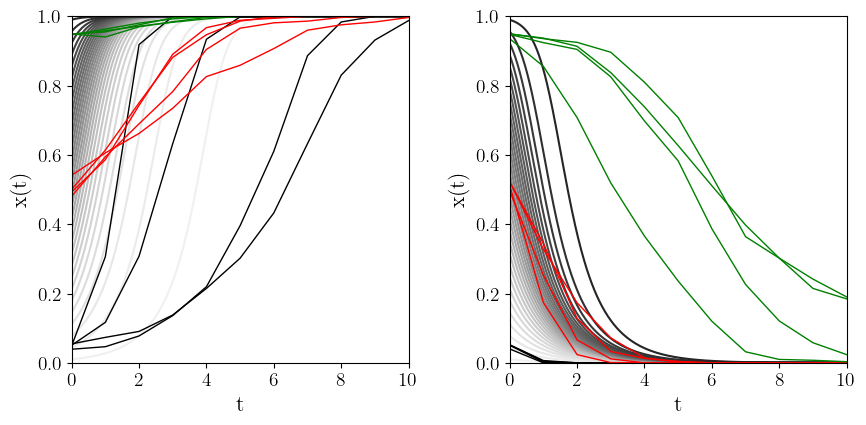

In [19]:
a,b,c,d = 10,6,7,5
Nx=35
Ny=35
N=int(Nx*Ny)
kbar=8
p=1
G = nx.erdos_renyi_graph(N, p)
degree_sequence = []
for i in G.nodes():
    degree_sequence.append(G.degree(i))
mink=min(degree_sequence)
maxk=max(degree_sequence)
Nensemble=4
Nit=11

tval = np.linspace(0, Nit, 1001)
cmap = plt.cm.Greys 
numx0 = 30
line_colors = cmap(np.linspace(0,1,numx0+10))
x0=np.linspace(0.01,0.99,numx0)

fig = plt.figure()
gs = gridspec.GridSpec(1, 2, width_ratios=[1,1], wspace=0.3)
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])

j = 0
while j < numx0:
    Loes = integrate.odeint(DGL, x0[j], tval)
    ax1.plot(tval,Loes,c=line_colors[j+5], linewidth=1.5, linestyle='-');
    j = j + 1 
ax1.set_ylabel(r"$\rm x(t)$")
ax1.set_xlabel(r"$\rm t$")
ax1.set_xlim(0,Nit-1)
ax1.set_ylim(0,1)

PropPlayers=np.zeros([N,10])
AverageStratPlayers=np.zeros([Nit+1,2])
for it in range(1,Nit+1):
    AverageStratPlayers[it].flat[0] = -1

NeighPlayers=np.zeros([N+1,10])

setx0=[0.05,0.5,0.95]
setcolorcurve=["black","red","green"]
cx0=0
    

for anfx0 in setx0:
    GemNash=(b-d)/(b+c-a-d)
#    print(GemNash)
    for ens in range(0,Nensemble):
        x0=anfx0
        k=0
        ColorPlayer=[]
        for i in range(0,Nx):
            for j in range(0,Ny):
                PropPlayers[k].flat[0] = k #Knotennummer
                PropPlayers[k].flat[1] = i #x-Koordinate auf dem 2-D Gitter
                PropPlayers[k].flat[2] = j #y-Koordinate auf dem 2-D Gitter
                strategy=uniform(0, 1000)#Zufaellige Strategienwahl 
                if strategy>=x0*1000:
                    PropPlayers[k].flat[3]=0 #entspricht Strategie s_2
                    ColorPlayer.append("red")
                else:
                    PropPlayers[k].flat[3]=1 #entspricht Strategie s_1
                    ColorPlayer.append("blue")
                k=k+1
        AverageStratPlayers[0].flat[0]=np.sum(PropPlayers[:,3])/N
        for i in range(0,Nit):
            for n in range(0,N):
                for neigh in range(0,10):
                    NeighPlayers[n].flat[neigh]=0
            
#            print("It:",i)
            NLinks=0
            for n in range(1,N):
                kneigh=NeighPlayers[n,0]
#                print("NLinks:",NLinks)
#                print("Nalt:",n,NeighPlayers[n,:])
                if NLinks < int(N*(kbar)/2)-kbar:
                    while kneigh < kbar:
                        setneigh=list(G.neighbors(n))[randint(0, len(list(G.neighbors(n)))-1)]
                        if setneigh != n and NeighPlayers[setneigh,0]<=kbar and setneigh not in NeighPlayers[n,1:int(NeighPlayers[n,0])+1] and n not in NeighPlayers[setneigh,1:int(NeighPlayers[setneigh,0])+1]:
                            NeighPlayers[n].flat[int(kneigh+1)]=setneigh
                            NeighPlayers[setneigh].flat[int(NeighPlayers[setneigh,0]+1)]=n
                            NeighPlayers[n].flat[0]=NeighPlayers[n,0]+1
                            NeighPlayers[setneigh].flat[0]=NeighPlayers[setneigh,0]+1
                            PropPlayers[n].flat[4] = Dollar(PropPlayers[n,3],PropPlayers[setneigh,3]) + PropPlayers[n,4] 
                            PropPlayers[setneigh].flat[4] = Dollar(PropPlayers[setneigh,3],PropPlayers[n,3]) + PropPlayers[setneigh,4]               
                            kneigh=kneigh+1
                            NLinks=NLinks+1
#                print("N:",n,NeighPlayers[n,:])
#                print("Neff:",NLinks/N)
#            print("N0:",0,NeighPlayers[0,:])
#            print("End1:")
            for n in range(0,N):
                PropPlayers[n].flat[5]=PropPlayers[n,3]
                maxpayoff=PropPlayers[n,4]
                for neig in list(NeighPlayers[n,1:]):
                    if PropPlayers[int(neig),4] > PropPlayers[n,4] and PropPlayers[int(neig),4] > maxpayoff:
                        maxpayoff = PropPlayers[int(neig),4]
                        PropPlayers[n].flat[5] = PropPlayers[int(neig),3]
            ColorPlayernew=[]
            ColorPlayer=[]
            for n in range(0,N):
                if PropPlayers[n,5]==0:
                    ColorPlayernew.append("red")
                if PropPlayers[n,5]==1:
                    ColorPlayernew.append("blue")
                if PropPlayers[n,3]==0:
                    ColorPlayer.append("red")
                if PropPlayers[n,3]==1:
                    ColorPlayer.append("blue") 
                PropPlayers[n].flat[3] = PropPlayers[n,5]
            PropPlayers[n].flat[4] = 0
            AverageStratPlayers[i+1].flat[0]=np.sum(PropPlayers[:,3])/N
            ColorPlayer=ColorPlayernew

#        print(x0,ens)
#        print(AverageStratPlayers[0:Nit,0])
        ax1.plot(range(0,Nit,1),AverageStratPlayers[0:Nit,0], linewidth=1, linestyle='-', alpha=1, c=setcolorcurve[cx0])
    ax1.plot([0,Nit],[GemNash,GemNash], linewidth=1, linestyle=':', alpha=0.7, c="grey")
    cx0=cx0+1



a,b,c,d = 7,5,10,6
Nx=35
Ny=35
N=int(Nx*Ny)
kbar=8
p=1
G = nx.erdos_renyi_graph(N, p)
degree_sequence = []
for i in G.nodes():
    degree_sequence.append(G.degree(i))
mink=min(degree_sequence)
maxk=max(degree_sequence)


tval = np.linspace(0, Nit, 1001)
cmap = plt.cm.Greys 
numx0 = 30
line_colors = cmap(np.linspace(0,1,numx0+10))
x0=np.linspace(0.01,0.99,numx0)

j = 0
while j < numx0:
    Loes = integrate.odeint(DGL, x0[j], tval)
    ax2.plot(tval,Loes,c=line_colors[j+5], linewidth=1.5, linestyle='-');
    j = j + 1 
ax2.set_ylabel(r"$\rm x(t)$")
ax2.set_xlabel(r"$\rm t$")
ax2.set_xlim(0,Nit-1)
ax2.set_ylim(0,1)

Nit=11
PropPlayers=np.zeros([N,10])
AverageStratPlayers=np.zeros([Nit+1,2])
for it in range(1,Nit+1):
    AverageStratPlayers[it].flat[0] = -1

NeighPlayers=np.zeros([N+1,10])

setx0=[0.05,0.5,0.95]
setcolorcurve=["black","red","green"]
cx0=0
    

for anfx0 in setx0:
    GemNash=(b-d)/(b+c-a-d)
    for ens in range(0,Nensemble):
        x0=anfx0
        k=0
        ColorPlayer=[]
        for i in range(0,Nx):
            for j in range(0,Ny):
                PropPlayers[k].flat[0] = k #Knotennummer
                PropPlayers[k].flat[1] = i #x-Koordinate auf dem 2-D Gitter
                PropPlayers[k].flat[2] = j #y-Koordinate auf dem 2-D Gitter
                strategy=uniform(0, 1000)#Zufaellige Strategienwahl 
                if strategy>=x0*1000:
                    PropPlayers[k].flat[3]=0 #entspricht Strategie s_2
                    ColorPlayer.append("red")
                else:
                    PropPlayers[k].flat[3]=1 #entspricht Strategie s_1
                    ColorPlayer.append("blue")
                k=k+1
        AverageStratPlayers[0].flat[0]=np.sum(PropPlayers[:,3])/N
        for i in range(0,Nit):
            for n in range(0,N):
                for neigh in range(0,10):
                    NeighPlayers[n].flat[neigh]=0
            
#            print("It:",i)
            NLinks=0
            for n in range(1,N):
                kneigh=NeighPlayers[n,0]
#                print("NLinks:",NLinks)
#                print("Nalt:",n,NeighPlayers[n,:])
                if NLinks < int(N*(kbar)/2)-kbar:
                    while kneigh < kbar:
                        setneigh=list(G.neighbors(n))[randint(0, len(list(G.neighbors(n)))-1)]
                        if setneigh != n and NeighPlayers[setneigh,0]<=kbar and setneigh not in NeighPlayers[n,1:int(NeighPlayers[n,0])+1] and n not in NeighPlayers[setneigh,1:int(NeighPlayers[setneigh,0])+1]:
                            NeighPlayers[n].flat[int(kneigh+1)]=setneigh
                            NeighPlayers[setneigh].flat[int(NeighPlayers[setneigh,0]+1)]=n
                            NeighPlayers[n].flat[0]=NeighPlayers[n,0]+1
                            NeighPlayers[setneigh].flat[0]=NeighPlayers[setneigh,0]+1
                            PropPlayers[n].flat[4] = Dollar(PropPlayers[n,3],PropPlayers[setneigh,3]) + PropPlayers[n,4] 
                            PropPlayers[setneigh].flat[4] = Dollar(PropPlayers[setneigh,3],PropPlayers[n,3]) + PropPlayers[setneigh,4]               
                            kneigh=kneigh+1
                            NLinks=NLinks+1
#                print("N:",n,NeighPlayers[n,:])
#                print("Neff:",NLinks/N)
#            print("N0:",0,NeighPlayers[0,:])
#            print("End1:")
            for n in range(0,N):
                PropPlayers[n].flat[5]=PropPlayers[n,3]
                maxpayoff=PropPlayers[n,4]
                for neig in list(NeighPlayers[n,1:]):
                    if PropPlayers[int(neig),4] > PropPlayers[n,4] and PropPlayers[int(neig),4] > maxpayoff:
                        maxpayoff = PropPlayers[int(neig),4]
                        PropPlayers[n].flat[5] = PropPlayers[int(neig),3]
            ColorPlayernew=[]
            ColorPlayer=[]
            for n in range(0,N):
                if PropPlayers[n,5]==0:
                    ColorPlayernew.append("red")
                if PropPlayers[n,5]==1:
                    ColorPlayernew.append("blue")
                if PropPlayers[n,3]==0:
                    ColorPlayer.append("red")
                if PropPlayers[n,3]==1:
                    ColorPlayer.append("blue") 
                PropPlayers[n].flat[3] = PropPlayers[n,5]
            PropPlayers[n].flat[4] = 0
            AverageStratPlayers[i+1].flat[0]=np.sum(PropPlayers[:,3])/N
            ColorPlayer=ColorPlayernew
#        print(x0,ens)
#        print(AverageStratPlayers[0:Nit,0])
        ax2.plot(range(0,Nit,1),AverageStratPlayers[0:Nit,0], linewidth=1, linestyle='-', alpha=1, c=setcolorcurve[cx0])
    ax2.plot([0,Nit],[GemNash,GemNash], linewidth=1, linestyle=':', alpha=0.7, c="grey")
    cx0=cx0+1

Wieder stimmen die Vorhersagen gut mit der Replikatordynamik der evolutionären Spieltheorie überein. 

Bei den räumlichen dominanten Spielen hatten wir gesehen, dass sich die dominante Strategie nur ab einer gewissen Stärke der Dominanz durchsetzen kann. Dies wollen wir nun auf unserem Netzwerk untersuchen und setzen dafür die Auszahlungswerte der beiden dominanten Spiele wie folgt an:

Linke Abbildung: 
$   \hat{\bf {\cal \$}}=
  \left( {\begin{array}{cc}
   1 & 0 \\
   c=1.1 & 0.01 \\
  \end{array} } \right) \quad,\qquad
$
Rechte Abbildung: 
$   \hat{\bf {\cal \$}}=
  \left( {\begin{array}{cc}
   1 & 0 \\
   c=1.3 & 0.01 \\
  \end{array} } \right) \qquad.$
Da sich aufgrund der schwachen Dominanz der Spiele (kleine c-Werte) die zeitliche Entwicklung verlangsamt, simulieren wir das Spiel nicht nur 11, sondern 35 Iterationen:

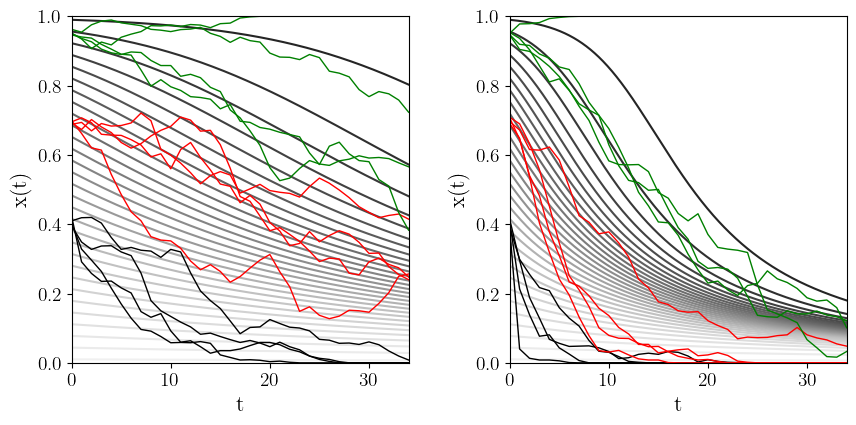

In [20]:
a,b,c,d = 1,0,1.1,0.01
Nx=35
Ny=35
N=int(Nx*Ny)
kbar=8
p=1
G = nx.erdos_renyi_graph(N, p)
degree_sequence = []
for i in G.nodes():
    degree_sequence.append(G.degree(i))
mink=min(degree_sequence)
maxk=max(degree_sequence)
Nensemble=4
Nit=35


tval = np.linspace(0, Nit, 1001)
cmap = plt.cm.Greys 
numx0 = 30
line_colors = cmap(np.linspace(0,1,numx0+10))
x0=np.linspace(0.01,0.99,numx0)

fig = plt.figure()
gs = gridspec.GridSpec(1, 2, width_ratios=[1,1], wspace=0.3)
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])

j = 0
while j < numx0:
    Loes = integrate.odeint(DGL, x0[j], tval)
    ax1.plot(tval,Loes,c=line_colors[j+5], linewidth=1.5, linestyle='-');
    j = j + 1 
ax1.set_ylabel(r"$\rm x(t)$")
ax1.set_xlabel(r"$\rm t$")
ax1.set_xlim(0,Nit-1)
ax1.set_ylim(0,1)

PropPlayers=np.zeros([N,10])
AverageStratPlayers=np.zeros([Nit+1,2])
for it in range(1,Nit+1):
    AverageStratPlayers[it].flat[0] = -1

NeighPlayers=np.zeros([N+1,10])

setx0=[0.4,0.7,0.95]
setcolorcurve=["black","red","green"]
cx0=0
    

for anfx0 in setx0:
    GemNash=(b-d)/(b+c-a-d)
#    print(GemNash)
    for ens in range(0,Nensemble):
        x0=anfx0
        k=0
        ColorPlayer=[]
        for i in range(0,Nx):
            for j in range(0,Ny):
                PropPlayers[k].flat[0] = k #Knotennummer
                PropPlayers[k].flat[1] = i #x-Koordinate auf dem 2-D Gitter
                PropPlayers[k].flat[2] = j #y-Koordinate auf dem 2-D Gitter
                strategy=uniform(0, 1000)#Zufaellige Strategienwahl 
                if strategy>=x0*1000:
                    PropPlayers[k].flat[3]=0 #entspricht Strategie s_2
                    ColorPlayer.append("red")
                else:
                    PropPlayers[k].flat[3]=1 #entspricht Strategie s_1
                    ColorPlayer.append("blue")
                k=k+1
        AverageStratPlayers[0].flat[0]=np.sum(PropPlayers[:,3])/N
        for i in range(0,Nit):
            for n in range(0,N):
                for neigh in range(0,10):
                    NeighPlayers[n].flat[neigh]=0
            
#            print("It:",i)
            NLinks=0
            for n in range(1,N):
                kneigh=NeighPlayers[n,0]
#                print("NLinks:",NLinks)
#                print("Nalt:",n,NeighPlayers[n,:])
                if NLinks < int(N*(kbar)/2)-kbar:
                    while kneigh < kbar:
                        setneigh=list(G.neighbors(n))[randint(0, len(list(G.neighbors(n)))-1)]
                        if setneigh != n and NeighPlayers[setneigh,0]<=kbar and setneigh not in NeighPlayers[n,1:int(NeighPlayers[n,0])+1] and n not in NeighPlayers[setneigh,1:int(NeighPlayers[setneigh,0])+1]:
                            NeighPlayers[n].flat[int(kneigh+1)]=setneigh
                            NeighPlayers[setneigh].flat[int(NeighPlayers[setneigh,0]+1)]=n
                            NeighPlayers[n].flat[0]=NeighPlayers[n,0]+1
                            NeighPlayers[setneigh].flat[0]=NeighPlayers[setneigh,0]+1
                            PropPlayers[n].flat[4] = Dollar(PropPlayers[n,3],PropPlayers[setneigh,3]) + PropPlayers[n,4] 
                            PropPlayers[setneigh].flat[4] = Dollar(PropPlayers[setneigh,3],PropPlayers[n,3]) + PropPlayers[setneigh,4]               
                            kneigh=kneigh+1
                            NLinks=NLinks+1
#                print("N:",n,NeighPlayers[n,:])
#                print("Neff:",NLinks/N)
#            print("N0:",0,NeighPlayers[0,:])
#            print("End1:")
            for n in range(0,N):
                PropPlayers[n].flat[5]=PropPlayers[n,3]
                maxpayoff=PropPlayers[n,4]
                for neig in list(NeighPlayers[n,1:]):
                    if PropPlayers[int(neig),4] > PropPlayers[n,4] and PropPlayers[int(neig),4] > maxpayoff:
                        maxpayoff = PropPlayers[int(neig),4]
                        PropPlayers[n].flat[5] = PropPlayers[int(neig),3]
            ColorPlayernew=[]
            ColorPlayer=[]
            for n in range(0,N):
                if PropPlayers[n,5]==0:
                    ColorPlayernew.append("red")
                if PropPlayers[n,5]==1:
                    ColorPlayernew.append("blue")
                if PropPlayers[n,3]==0:
                    ColorPlayer.append("red")
                if PropPlayers[n,3]==1:
                    ColorPlayer.append("blue") 
                PropPlayers[n].flat[3] = PropPlayers[n,5]
            PropPlayers[n].flat[4] = 0
            AverageStratPlayers[i+1].flat[0]=np.sum(PropPlayers[:,3])/N
            ColorPlayer=ColorPlayernew

#        print(x0,ens)
#        print(AverageStratPlayers[0:Nit,0])
        ax1.plot(range(0,Nit,1),AverageStratPlayers[0:Nit,0], linewidth=1, linestyle='-', alpha=1, c=setcolorcurve[cx0])
    ax1.plot([0,Nit],[GemNash,GemNash], linewidth=1, linestyle=':', alpha=0.7, c="grey")
    cx0=cx0+1



a,b,c,d = 1,0,1.3,0.01
Nx=35
Ny=35
N=int(Nx*Ny)
kbar=8
p=1
G = nx.erdos_renyi_graph(N, p)
degree_sequence = []
for i in G.nodes():
    degree_sequence.append(G.degree(i))
mink=min(degree_sequence)
maxk=max(degree_sequence)


tval = np.linspace(0, Nit, 1001)
cmap = plt.cm.Greys 
numx0 = 30
line_colors = cmap(np.linspace(0,1,numx0+10))
x0=np.linspace(0.01,0.99,numx0)

j = 0
while j < numx0:
    Loes = integrate.odeint(DGL, x0[j], tval)
    ax2.plot(tval,Loes,c=line_colors[j+5], linewidth=1.5, linestyle='-');
    j = j + 1 
ax2.set_ylabel(r"$\rm x(t)$")
ax2.set_xlabel(r"$\rm t$")
ax2.set_xlim(0,Nit-1)
ax2.set_ylim(0,1)

PropPlayers=np.zeros([N,10])
AverageStratPlayers=np.zeros([Nit+1,2])
for it in range(1,Nit+1):
    AverageStratPlayers[it].flat[0] = -1

NeighPlayers=np.zeros([N+1,10])

setx0=[0.4,0.7,0.95]
setcolorcurve=["black","red","green"]
cx0=0
    

for anfx0 in setx0:
    GemNash=(b-d)/(b+c-a-d)
    for ens in range(0,Nensemble):
        x0=anfx0
        k=0
        ColorPlayer=[]
        for i in range(0,Nx):
            for j in range(0,Ny):
                PropPlayers[k].flat[0] = k #Knotennummer
                PropPlayers[k].flat[1] = i #x-Koordinate auf dem 2-D Gitter
                PropPlayers[k].flat[2] = j #y-Koordinate auf dem 2-D Gitter
                strategy=uniform(0, 1000)#Zufaellige Strategienwahl 
                if strategy>=x0*1000:
                    PropPlayers[k].flat[3]=0 #entspricht Strategie s_2
                    ColorPlayer.append("red")
                else:
                    PropPlayers[k].flat[3]=1 #entspricht Strategie s_1
                    ColorPlayer.append("blue")
                k=k+1
        AverageStratPlayers[0].flat[0]=np.sum(PropPlayers[:,3])/N
        for i in range(0,Nit):
            for n in range(0,N):
                for neigh in range(0,10):
                    NeighPlayers[n].flat[neigh]=0
            
#            print("It:",i)
            NLinks=0
            for n in range(1,N):
                kneigh=NeighPlayers[n,0]
#                print("NLinks:",NLinks)
#                print("Nalt:",n,NeighPlayers[n,:])
                if NLinks < int(N*(kbar)/2)-kbar:
                    while kneigh < kbar:
                        setneigh=list(G.neighbors(n))[randint(0, len(list(G.neighbors(n)))-1)]
                        if setneigh != n and NeighPlayers[setneigh,0]<=kbar and setneigh not in NeighPlayers[n,1:int(NeighPlayers[n,0])+1] and n not in NeighPlayers[setneigh,1:int(NeighPlayers[setneigh,0])+1]:
                            NeighPlayers[n].flat[int(kneigh+1)]=setneigh
                            NeighPlayers[setneigh].flat[int(NeighPlayers[setneigh,0]+1)]=n
                            NeighPlayers[n].flat[0]=NeighPlayers[n,0]+1
                            NeighPlayers[setneigh].flat[0]=NeighPlayers[setneigh,0]+1
                            PropPlayers[n].flat[4] = Dollar(PropPlayers[n,3],PropPlayers[setneigh,3]) + PropPlayers[n,4] 
                            PropPlayers[setneigh].flat[4] = Dollar(PropPlayers[setneigh,3],PropPlayers[n,3]) + PropPlayers[setneigh,4]               
                            kneigh=kneigh+1
                            NLinks=NLinks+1
#                print("N:",n,NeighPlayers[n,:])
#                print("Neff:",NLinks/N)
#            print("N0:",0,NeighPlayers[0,:])
#            print("End1:")
            for n in range(0,N):
                PropPlayers[n].flat[5]=PropPlayers[n,3]
                maxpayoff=PropPlayers[n,4]
                for neig in list(NeighPlayers[n,1:]):
                    if PropPlayers[int(neig),4] > PropPlayers[n,4] and PropPlayers[int(neig),4] > maxpayoff:
                        maxpayoff = PropPlayers[int(neig),4]
                        PropPlayers[n].flat[5] = PropPlayers[int(neig),3]
            ColorPlayernew=[]
            ColorPlayer=[]
            for n in range(0,N):
                if PropPlayers[n,5]==0:
                    ColorPlayernew.append("red")
                if PropPlayers[n,5]==1:
                    ColorPlayernew.append("blue")
                if PropPlayers[n,3]==0:
                    ColorPlayer.append("red")
                if PropPlayers[n,3]==1:
                    ColorPlayer.append("blue") 
                PropPlayers[n].flat[3] = PropPlayers[n,5]
            PropPlayers[n].flat[4] = 0
            AverageStratPlayers[i+1].flat[0]=np.sum(PropPlayers[:,3])/N
            ColorPlayer=ColorPlayernew
#        print(x0,ens)
#        print(AverageStratPlayers[0:Nit,0])
        ax2.plot(range(0,Nit,1),AverageStratPlayers[0:Nit,0], linewidth=1, linestyle='-', alpha=1, c=setcolorcurve[cx0])
    ax2.plot([0,Nit],[GemNash,GemNash], linewidth=1, linestyle=':', alpha=0.7, c="grey")
    cx0=cx0+1

Im Gegensatz zu den räumlichen Spielen stimmen in den meisten Simulationen die Vorhersagen mit der Replikatordynamik überein. Wir betrachten uns im Folgenden eine spezielle Simulation mit $c=1.1$ und setzen die Anfangsbedingung der Population so, dass nur ein Spieler die Strategie 2 spielt:

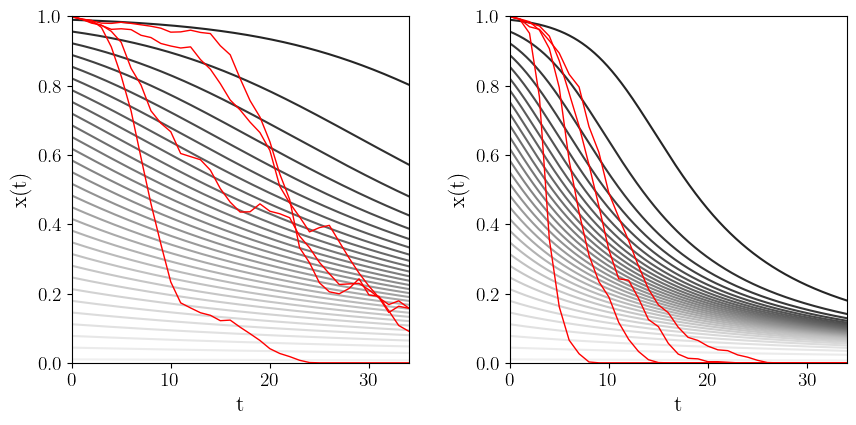

In [21]:
a,b,c,d = 1,0,1.1,0.01
Nx=35
Ny=35
N=int(Nx*Ny)
kbar=8
p=1
G = nx.erdos_renyi_graph(N, p)
degree_sequence = []
for i in G.nodes():
    degree_sequence.append(G.degree(i))
mink=min(degree_sequence)
maxk=max(degree_sequence)
Nensemble=4
Nit=35


tval = np.linspace(0, Nit, 1001)
cmap = plt.cm.Greys 
numx0 = 30
line_colors = cmap(np.linspace(0,1,numx0+10))
x0=np.linspace(0.01,0.99,numx0)

fig = plt.figure()
gs = gridspec.GridSpec(1, 2, width_ratios=[1,1], wspace=0.3)
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])

j = 0
while j < numx0:
    Loes = integrate.odeint(DGL, x0[j], tval)
    ax1.plot(tval,Loes,c=line_colors[j+5], linewidth=1.5, linestyle='-');
    j = j + 1 
ax1.set_ylabel(r"$\rm x(t)$")
ax1.set_xlabel(r"$\rm t$")
ax1.set_xlim(0,Nit-1)
ax1.set_ylim(0,1)

PropPlayers=np.zeros([N,10])
AverageStratPlayers=np.zeros([Nit+1,2])
for it in range(1,Nit+1):
    AverageStratPlayers[it].flat[0] = -1

NeighPlayers=np.zeros([N+1,10])

setx0=[1]
setcolorcurve=["red","green"]
cx0=0
    

for anfx0 in setx0:
    GemNash=(b-d)/(b+c-a-d)
#    print(GemNash)
    for ens in range(0,Nensemble):
        x0=anfx0
        k=0
        ColorPlayer=[]
        for i in range(0,Nx):
            for j in range(0,Ny):
                PropPlayers[k].flat[0] = k #Knotennummer
                PropPlayers[k].flat[1] = i #x-Koordinate auf dem 2-D Gitter
                PropPlayers[k].flat[2] = j #y-Koordinate auf dem 2-D Gitter
#                strategy=uniform(0, 1000)#Zufaellige Strategienwahl 
                if k==int(N/2):
                    PropPlayers[k].flat[3]=0 #entspricht Strategie s_2
                    ColorPlayer.append("red")
                else:
                    PropPlayers[k].flat[3]=1 #entspricht Strategie s_1
                    ColorPlayer.append("blue")
                k=k+1
        AverageStratPlayers[0].flat[0]=np.sum(PropPlayers[:,3])/N
        for i in range(0,Nit):
            for n in range(0,N):
                for neigh in range(0,10):
                    NeighPlayers[n].flat[neigh]=0
            
#            print("It:",i)
            NLinks=0
            for n in range(1,N):
                kneigh=NeighPlayers[n,0]
#                print("NLinks:",NLinks)
#                print("Nalt:",n,NeighPlayers[n,:])
                if NLinks < int(N*(kbar)/2)-kbar:
                    while kneigh < kbar:
                        setneigh=list(G.neighbors(n))[randint(0, len(list(G.neighbors(n)))-1)]
                        if setneigh != n and NeighPlayers[setneigh,0]<=kbar and setneigh not in NeighPlayers[n,1:int(NeighPlayers[n,0])+1] and n not in NeighPlayers[setneigh,1:int(NeighPlayers[setneigh,0])+1]:
                            NeighPlayers[n].flat[int(kneigh+1)]=setneigh
                            NeighPlayers[setneigh].flat[int(NeighPlayers[setneigh,0]+1)]=n
                            NeighPlayers[n].flat[0]=NeighPlayers[n,0]+1
                            NeighPlayers[setneigh].flat[0]=NeighPlayers[setneigh,0]+1
                            PropPlayers[n].flat[4] = Dollar(PropPlayers[n,3],PropPlayers[setneigh,3]) + PropPlayers[n,4] 
                            PropPlayers[setneigh].flat[4] = Dollar(PropPlayers[setneigh,3],PropPlayers[n,3]) + PropPlayers[setneigh,4]               
                            kneigh=kneigh+1
                            NLinks=NLinks+1
#                print("N:",n,NeighPlayers[n,:])
#                print("Neff:",NLinks/N)
#            print("N0:",0,NeighPlayers[0,:])
#            print("End1:")
            for n in range(0,N):
                PropPlayers[n].flat[5]=PropPlayers[n,3]
                maxpayoff=PropPlayers[n,4]
                for neig in list(NeighPlayers[n,1:]):
                    if PropPlayers[int(neig),4] > PropPlayers[n,4] and PropPlayers[int(neig),4] > maxpayoff:
                        maxpayoff = PropPlayers[int(neig),4]
                        PropPlayers[n].flat[5] = PropPlayers[int(neig),3]
            ColorPlayernew=[]
            ColorPlayer=[]
            for n in range(0,N):
                if PropPlayers[n,5]==0:
                    ColorPlayernew.append("red")
                if PropPlayers[n,5]==1:
                    ColorPlayernew.append("blue")
                if PropPlayers[n,3]==0:
                    ColorPlayer.append("red")
                if PropPlayers[n,3]==1:
                    ColorPlayer.append("blue") 
                PropPlayers[n].flat[3] = PropPlayers[n,5]
            PropPlayers[n].flat[4] = 0
            AverageStratPlayers[i+1].flat[0]=np.sum(PropPlayers[:,3])/N
            ColorPlayer=ColorPlayernew

#        print(x0,ens)
#        print(AverageStratPlayers[0:Nit,0])
        ax1.plot(range(0,Nit,1),AverageStratPlayers[0:Nit,0], linewidth=1, linestyle='-', alpha=1, c=setcolorcurve[cx0])
    ax1.plot([0,Nit],[GemNash,GemNash], linewidth=1, linestyle=':', alpha=0.7, c="grey")
    cx0=cx0+1



a,b,c,d = 1,0,1.3,0.01
Nx=35
Ny=35
N=int(Nx*Ny)
kbar=8
p=1
G = nx.erdos_renyi_graph(N, p)
degree_sequence = []
for i in G.nodes():
    degree_sequence.append(G.degree(i))
mink=min(degree_sequence)
maxk=max(degree_sequence)


tval = np.linspace(0, Nit, 1001)
cmap = plt.cm.Greys 
numx0 = 30
line_colors = cmap(np.linspace(0,1,numx0+10))
x0=np.linspace(0.01,0.99,numx0)

j = 0
while j < numx0:
    Loes = integrate.odeint(DGL, x0[j], tval)
    ax2.plot(tval,Loes,c=line_colors[j+5], linewidth=1.5, linestyle='-');
    j = j + 1 
ax2.set_ylabel(r"$\rm x(t)$")
ax2.set_xlabel(r"$\rm t$")
ax2.set_xlim(0,Nit-1)
ax2.set_ylim(0,1)

PropPlayers=np.zeros([N,10])
AverageStratPlayers=np.zeros([Nit+1,2])
for it in range(1,Nit+1):
    AverageStratPlayers[it].flat[0] = -1

NeighPlayers=np.zeros([N+1,10])

setx0=[1]
setcolorcurve=["red","green"]
cx0=0
    

for anfx0 in setx0:
    GemNash=(b-d)/(b+c-a-d)
    for ens in range(0,Nensemble):
        x0=anfx0
        k=0
        ColorPlayer=[]
        for i in range(0,Nx):
            for j in range(0,Ny):
                PropPlayers[k].flat[0] = k #Knotennummer
                PropPlayers[k].flat[1] = i #x-Koordinate auf dem 2-D Gitter
                PropPlayers[k].flat[2] = j #y-Koordinate auf dem 2-D Gitter
#                strategy=uniform(0, 1000)#Zufaellige Strategienwahl 
                if k==int(N/2):
                    PropPlayers[k].flat[3]=0 #entspricht Strategie s_2
                    ColorPlayer.append("red")
                else:
                    PropPlayers[k].flat[3]=1 #entspricht Strategie s_1
                    ColorPlayer.append("blue")
                k=k+1
        AverageStratPlayers[0].flat[0]=np.sum(PropPlayers[:,3])/N
        for i in range(0,Nit):
            for n in range(0,N):
                for neigh in range(0,10):
                    NeighPlayers[n].flat[neigh]=0
            
#            print("It:",i)
            NLinks=0
            for n in range(1,N):
                kneigh=NeighPlayers[n,0]
#                print("NLinks:",NLinks)
#                print("Nalt:",n,NeighPlayers[n,:])
                if NLinks < int(N*(kbar)/2)-kbar:
                    while kneigh < kbar:
                        setneigh=list(G.neighbors(n))[randint(0, len(list(G.neighbors(n)))-1)]
                        if setneigh != n and NeighPlayers[setneigh,0]<=kbar and setneigh not in NeighPlayers[n,1:int(NeighPlayers[n,0])+1] and n not in NeighPlayers[setneigh,1:int(NeighPlayers[setneigh,0])+1]:
                            NeighPlayers[n].flat[int(kneigh+1)]=setneigh
                            NeighPlayers[setneigh].flat[int(NeighPlayers[setneigh,0]+1)]=n
                            NeighPlayers[n].flat[0]=NeighPlayers[n,0]+1
                            NeighPlayers[setneigh].flat[0]=NeighPlayers[setneigh,0]+1
                            PropPlayers[n].flat[4] = Dollar(PropPlayers[n,3],PropPlayers[setneigh,3]) + PropPlayers[n,4] 
                            PropPlayers[setneigh].flat[4] = Dollar(PropPlayers[setneigh,3],PropPlayers[n,3]) + PropPlayers[setneigh,4]               
                            kneigh=kneigh+1
                            NLinks=NLinks+1
#                print("N:",n,NeighPlayers[n,:])
#                print("Neff:",NLinks/N)
#            print("N0:",0,NeighPlayers[0,:])
#            print("End1:")
            for n in range(0,N):
                PropPlayers[n].flat[5]=PropPlayers[n,3]
                maxpayoff=PropPlayers[n,4]
                for neig in list(NeighPlayers[n,1:]):
                    if PropPlayers[int(neig),4] > PropPlayers[n,4] and PropPlayers[int(neig),4] > maxpayoff:
                        maxpayoff = PropPlayers[int(neig),4]
                        PropPlayers[n].flat[5] = PropPlayers[int(neig),3]
            ColorPlayernew=[]
            ColorPlayer=[]
            for n in range(0,N):
                if PropPlayers[n,5]==0:
                    ColorPlayernew.append("red")
                if PropPlayers[n,5]==1:
                    ColorPlayernew.append("blue")
                if PropPlayers[n,3]==0:
                    ColorPlayer.append("red")
                if PropPlayers[n,3]==1:
                    ColorPlayer.append("blue") 
                PropPlayers[n].flat[3] = PropPlayers[n,5]
            PropPlayers[n].flat[4] = 0
            AverageStratPlayers[i+1].flat[0]=np.sum(PropPlayers[:,3])/N
            ColorPlayer=ColorPlayernew
#        print(x0,ens)
#        print(AverageStratPlayers[0:Nit,0])
        ax2.plot(range(0,Nit,1),AverageStratPlayers[0:Nit,0], linewidth=1, linestyle='-', alpha=1, c=setcolorcurve[cx0])
    ax2.plot([0,Nit],[GemNash,GemNash], linewidth=1, linestyle=':', alpha=0.7, c="grey")
    cx0=cx0+1

Man erkennt im Gegensatz zu den Ergebnissen der räumlichen Spiele, dass sich auch bei geringer Dominanz des Spiels (links $c=1.1$, rechts $c=1.3$) die zweite Strategie sich durchsetzt, wie es von der Replikatordynamik vorhergesagt wird.

In der Realität sind jedoch meist die Annahmen eines vollständig verbundenen Netzwerkes nicht erfüllt. Wir betrachten uns deshalb nun ein Spiel auf einem kleine Welt Netzwerk, wobei wir jedoch zunächst wieder das Spiel auf einem regulären Ringnetzwerk betrachten:

In [22]:
a,b,c,d = 3,4,1,5
Nx=20
Ny=20
N=int(Nx*Ny)
kbar=4
p=kbar/(N-1)
KleineWeltLinks=0

G=nx.Graph()
G.add_nodes_from(range(0,N,1))
i=0
while i <= N-3:
    G.add_edge(i,i+1)
    G.add_edge(i,i+2)
    i=i+1
G.add_edge(N-2,N-1)  
G.add_edge(N-2,0)
G.add_edge(N-1,0)
G.add_edge(N-1,1)

NewEdge=0
while NewEdge<=KleineWeltLinks:  
    KnA = randint(0, N-1)
    NeigList = list(G.neighbors(KnA))
    Neig = randint(0, len(NeigList)-1)
    KnB = NeigList[Neig]
    KnC = randint(0, N-1)
    if KnA != KnC and list(G.edges()).count((KnA,KnC))==0 and list(G.edges()).count((KnC,KnA))==0 and KnB != KnC:
        G.remove_edge(KnA, KnB)
        G.add_edge(KnA,KnC)
        NewEdge=NewEdge+1 

degree_sequence=[]
for i in G.nodes():
    degree_sequence.append(G.degree(i))        
mink=min(degree_sequence)
maxk=max(degree_sequence) 

x0=0.6
Nit=40
PropPlayers=np.zeros([N,10])
AverageStratPlayers=np.zeros([Nit+1,2])
for it in range(1,Nit+1):
    AverageStratPlayers[it].flat[0] = -1

pos2d=nx.fruchterman_reingold_layout(G,dim=2)

k=0
ColorPlayer=[]
for i in range(0,Nx):
    for j in range(0,Ny):
        PropPlayers[k].flat[0] = k #Knotennummer
        PropPlayers[k].flat[1] = pos2d[k][0] #x-Koordinate auf dem 2-D Gitter
        PropPlayers[k].flat[2] = pos2d[k][1] #y-Koordinate auf dem 2-D Gitter
        strategy=uniform(0, 10000)#Zufaellige Strategienwahl 
        if strategy>=x0*10000:
            PropPlayers[k].flat[3]=0 #entspricht Strategie s_2
            ColorPlayer.append("red")
        else:
            PropPlayers[k].flat[3]=1 #entspricht Strategie s_1
            ColorPlayer.append("blue")
        k=k+1

tval = np.linspace(0, Nit, 1001)
cmap = plt.cm.Blues 
numx0 = 30
line_colors = cmap(np.linspace(0,1,numx0+10))
x0=np.linspace(0.01,0.99,numx0)

fig = plt.figure()
gs = gridspec.GridSpec(1, 2, width_ratios=[1,1], wspace=0.3)
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])

j = 0
while j < numx0:
    Loes = integrate.odeint(DGL, x0[j], tval)
    ax1.plot(tval,Loes,c=line_colors[j+5], linewidth=1.5, linestyle='-');
    j = j + 1 
ax1.set_ylabel(r"$\rm x(t)$")
ax1.set_xlabel(r"$\rm t$")
ax1.set_xlim(0,Nit-1)
ax1.set_ylim(0,1)

def init():   
    ax2.scatter(PropPlayers[:,1],PropPlayers[:,2],s=30,c=ColorPlayer,marker="s",alpha=1,edgecolor='none')
    ax2.set_xlim(-0.75, Nx-0.25)
    ax2.set_ylim(-0.75, Ny-0.25)
    ax2.set_ylabel(r"$\rm y$")
    ax2.set_xlabel(r"$\rm x$")
    AverageStratPlayers[0].flat[0]=np.sum(PropPlayers[:,3])/N
    ax1.scatter(0,AverageStratPlayers[0,0], alpha=1, c="black",marker="o",s=50)
    return fig,

def animate(i):
    ax2.cla()
    for games in list(G.edges):
        ax2.plot([pos2d[games[0]][0],pos2d[games[1]][0]], [pos2d[games[0]][1],pos2d[games[1]][1]], alpha=0.3, linewidth=0.1, c="black")
        PropPlayers[games[0]].flat[4] = Dollar(PropPlayers[games[0],3],PropPlayers[games[1],3]) + PropPlayers[games[0],4] 
        PropPlayers[games[1]].flat[4] = Dollar(PropPlayers[games[1],3],PropPlayers[games[0],3]) + PropPlayers[games[1],4] 
    for n in range(0,N):
        PropPlayers[n].flat[5]=PropPlayers[n,3]
        maxpayoff=PropPlayers[n,4]/G.degree(n)
        for neig in list(G.neighbors(n)):
            if PropPlayers[neig,4]/G.degree(neig) > PropPlayers[n,4]/G.degree(neig) and PropPlayers[neig,4]/G.degree(neig) > maxpayoff:
                maxpayoff = PropPlayers[neig,4]/G.degree(n)
                PropPlayers[n].flat[5] = PropPlayers[neig,3]
    ColorPlayernew=[]
    ColorPlayer=[]
    for n in range(0,N):
        if PropPlayers[n,5]==0:
            ColorPlayernew.append("red")
        if PropPlayers[n,5]==1:
            ColorPlayernew.append("blue")
        if PropPlayers[n,3]==0:
            ColorPlayer.append("red")
        if PropPlayers[n,3]==1:
            ColorPlayer.append("blue") 
        PropPlayers[n].flat[3] = PropPlayers[n,5]
        PropPlayers[n].flat[4] = 0
    AverageStratPlayers[i+1].flat[0]=np.sum(PropPlayers[:,3])/N
    ax1.plot(range(0,i+1,1),AverageStratPlayers[0:i+1,0], linewidth=1, linestyle='-', alpha=1, c="black")
    ax2.scatter(PropPlayers[:,1],PropPlayers[:,2],s=16,c=ColorPlayer,marker="o",alpha=1,edgecolor='none')
    ColorPlayer=ColorPlayernew
    return fig,

ani = animation.FuncAnimation(fig,animate,init_func=init,frames=Nit,interval=700)

plt.close(ani._fig)

HTML(ani.to_html5_video())

Man erkennt, dass sich die rote Strategie im Laufe der Zeit immer mehr auf dem Ringgitter durchsetzt, die zeitliche Ausbreitung jedoch sehr langsam ist. 
Wir betrachten uns nun die zeitliche Entwicklung auf einem "kleine Welt"-Netzwerk und erzeugen nach der Vorgehensweise von Watts und Strogatz 50 zufällige Spielerverbindungen:

In [23]:
a,b,c,d = 3,4,1,5
Nx=20
Ny=20
N=int(Nx*Ny)
kbar=4
p=kbar/(N-1)
KleineWeltLinks=50

G=nx.Graph()
G.add_nodes_from(range(0,N,1))
i=0
while i <= N-3:
    G.add_edge(i,i+1)
    G.add_edge(i,i+2)
    i=i+1
G.add_edge(N-2,N-1)  
G.add_edge(N-2,0)
G.add_edge(N-1,0)
G.add_edge(N-1,1)

NewEdge=0
while NewEdge<=KleineWeltLinks:  
    KnA = randint(0, N-1)
    NeigList = list(G.neighbors(KnA))
    Neig = randint(0, len(NeigList)-1)
    KnB = NeigList[Neig]
    KnC = randint(0, N-1)
    if KnA != KnC and list(G.edges()).count((KnA,KnC))==0 and list(G.edges()).count((KnC,KnA))==0 and KnB != KnC:
        G.remove_edge(KnA, KnB)
        G.add_edge(KnA,KnC)
        NewEdge=NewEdge+1 

degree_sequence=[]
for i in G.nodes():
    degree_sequence.append(G.degree(i))        
mink=min(degree_sequence)
maxk=max(degree_sequence) 

x0=0.6
Nit=20
PropPlayers=np.zeros([N,10])
AverageStratPlayers=np.zeros([Nit+1,2])
for it in range(1,Nit+1):
    AverageStratPlayers[it].flat[0] = -1

pos2d=nx.fruchterman_reingold_layout(G,dim=2)

k=0
ColorPlayer=[]
for i in range(0,Nx):
    for j in range(0,Ny):
        PropPlayers[k].flat[0] = k #Knotennummer
        PropPlayers[k].flat[1] = pos2d[k][0] #x-Koordinate auf dem 2-D Gitter
        PropPlayers[k].flat[2] = pos2d[k][1] #y-Koordinate auf dem 2-D Gitter
        strategy=uniform(0, 10000)#Zufaellige Strategienwahl 
        if strategy>=x0*10000:
            PropPlayers[k].flat[3]=0 #entspricht Strategie s_2
            ColorPlayer.append("red")
        else:
            PropPlayers[k].flat[3]=1 #entspricht Strategie s_1
            ColorPlayer.append("blue")
        k=k+1

tval = np.linspace(0, Nit, 1001)
cmap = plt.cm.Blues 
numx0 = 30
line_colors = cmap(np.linspace(0,1,numx0+10))
x0=np.linspace(0.01,0.99,numx0)

fig = plt.figure()
gs = gridspec.GridSpec(1, 2, width_ratios=[1,1], wspace=0.3)
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])

j = 0
while j < numx0:
    Loes = integrate.odeint(DGL, x0[j], tval)
    ax1.plot(tval,Loes,c=line_colors[j+5], linewidth=1.5, linestyle='-');
    j = j + 1 
ax1.set_ylabel(r"$\rm x(t)$")
ax1.set_xlabel(r"$\rm t$")
ax1.set_xlim(0,Nit-1)
ax1.set_ylim(0,1)

def init():   
    ax2.scatter(PropPlayers[:,1],PropPlayers[:,2],s=30,c=ColorPlayer,marker="s",alpha=1,edgecolor='none')
    ax2.set_xlim(-0.75, Nx-0.25)
    ax2.set_ylim(-0.75, Ny-0.25)
    ax2.set_ylabel(r"$\rm y$")
    ax2.set_xlabel(r"$\rm x$")
    AverageStratPlayers[0].flat[0]=np.sum(PropPlayers[:,3])/N
    ax1.scatter(0,AverageStratPlayers[0,0], alpha=1, c="black",marker="o",s=50)
    return fig,

def animate(i):
    ax2.cla()
    for games in list(G.edges):
        ax2.plot([pos2d[games[0]][0],pos2d[games[1]][0]], [pos2d[games[0]][1],pos2d[games[1]][1]], alpha=0.3, linewidth=0.1, c="black")
        PropPlayers[games[0]].flat[4] = Dollar(PropPlayers[games[0],3],PropPlayers[games[1],3]) + PropPlayers[games[0],4] 
        PropPlayers[games[1]].flat[4] = Dollar(PropPlayers[games[1],3],PropPlayers[games[0],3]) + PropPlayers[games[1],4] 
    for n in range(0,N):
        PropPlayers[n].flat[5]=PropPlayers[n,3]
        maxpayoff=PropPlayers[n,4]/G.degree(n)
        for neig in list(G.neighbors(n)):
            if PropPlayers[neig,4]/G.degree(neig) > PropPlayers[n,4]/G.degree(neig) and PropPlayers[neig,4]/G.degree(neig) > maxpayoff:
                maxpayoff = PropPlayers[neig,4]/G.degree(n)
                PropPlayers[n].flat[5] = PropPlayers[neig,3]
    ColorPlayernew=[]
    ColorPlayer=[]
    for n in range(0,N):
        if PropPlayers[n,5]==0:
            ColorPlayernew.append("red")
        if PropPlayers[n,5]==1:
            ColorPlayernew.append("blue")
        if PropPlayers[n,3]==0:
            ColorPlayer.append("red")
        if PropPlayers[n,3]==1:
            ColorPlayer.append("blue") 
        PropPlayers[n].flat[3] = PropPlayers[n,5]
        PropPlayers[n].flat[4] = 0
    AverageStratPlayers[i+1].flat[0]=np.sum(PropPlayers[:,3])/N
    ax1.plot(range(0,i+1,1),AverageStratPlayers[0:i+1,0], linewidth=1, linestyle='-', alpha=1, c="black")
    ax2.scatter(PropPlayers[:,1],PropPlayers[:,2],s=16,c=ColorPlayer,marker="o",alpha=1,edgecolor='none')
    ColorPlayer=ColorPlayernew
    return fig,

ani = animation.FuncAnimation(fig,animate,init_func=init,frames=Nit,interval=700)

plt.close(ani._fig)

HTML(ani.to_html5_video())

Bei dieser Simulation auf einem kleine Welt Netzwerk kann sich die rote Strategie nicht durchsetzen und der Endzustand der Population besteht lediglich aus einigen roten Gruppen-Clustern.

Wir betrachten nun das Koordinationsspiel auf einem skalenfreien Netzwerk ($<\! k \!>_{\rm eff} \approx 2$) und stellen uns die simulierten Ergebnisse im kamada_kawai_layout dar. 

In [24]:
a,b,c,d = 3,4,1,5
Nx=20
Ny=20
N=int(Nx*Ny)
kbar=2
K=int(kbar/2)

G=nx.barabasi_albert_graph(N,K)

sumki=0
for i in G.nodes():
    sumki=sumki+G.degree()[i]
avki=sumki/N
print("kbar=",avki)

x0=0.60
Nit=10
PropPlayers=np.zeros([N,10])
AverageStratPlayers=np.zeros([Nit+1,2])
for it in range(1,Nit+1):
    AverageStratPlayers[it].flat[0] = -1

#pos2d=nx.fruchterman_reingold_layout(G,dim=2)
pos2d=nx.kamada_kawai_layout(G,dim=2)

k=0
ColorPlayer=[]
for i in range(0,Nx):
    for j in range(0,Ny):
        PropPlayers[k].flat[0] = k #Knotennummer
        PropPlayers[k].flat[1] = pos2d[k][0] #x-Koordinate auf dem 2-D Gitter
        PropPlayers[k].flat[2] = pos2d[k][1] #y-Koordinate auf dem 2-D Gitter
        strategy=uniform(0, 10000)#Zufaellige Strategienwahl 
        if strategy>=x0*10000:
            PropPlayers[k].flat[3]=0 #entspricht Strategie s_2
            ColorPlayer.append("red")
        else:
            PropPlayers[k].flat[3]=1 #entspricht Strategie s_1
            ColorPlayer.append("blue")
        k=k+1

tval = np.linspace(0, Nit, 1001)
cmap = plt.cm.Blues 
numx0 = 30
line_colors = cmap(np.linspace(0,1,numx0+10))
x0=np.linspace(0.01,0.99,numx0)

fig = plt.figure()
gs = gridspec.GridSpec(1, 2, width_ratios=[1,1], wspace=0.3)
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])

j = 0
while j < numx0:
    Loes = integrate.odeint(DGL, x0[j], tval)
    ax1.plot(tval,Loes,c=line_colors[j+5], linewidth=1.5, linestyle='-');
    j = j + 1 
ax1.set_ylabel(r"$\rm x(t)$")
ax1.set_xlabel(r"$\rm t$")
ax1.set_xlim(0,Nit-1)
ax1.set_ylim(0,1)

def init():   
    ax2.scatter(PropPlayers[:,1],PropPlayers[:,2],s=30,c=ColorPlayer,marker="s",alpha=1,edgecolor='none')
    ax2.set_xlim(-0.75, Nx-0.25)
    ax2.set_ylim(-0.75, Ny-0.25)
    ax2.set_ylabel(r"$\rm y$")
    ax2.set_xlabel(r"$\rm x$")
    AverageStratPlayers[0].flat[0]=np.sum(PropPlayers[:,3])/N
    ax1.scatter(0,AverageStratPlayers[0,0], alpha=1, c="black",marker="o",s=50)
    return fig,

def animate(i):
    ax2.cla()
    for games in list(G.edges):
        ax2.plot([pos2d[games[0]][0],pos2d[games[1]][0]], [pos2d[games[0]][1],pos2d[games[1]][1]], alpha=0.3, linewidth=0.1, c="black")
        PropPlayers[games[0]].flat[4] = Dollar(PropPlayers[games[0],3],PropPlayers[games[1],3]) + PropPlayers[games[0],4] 
        PropPlayers[games[1]].flat[4] = Dollar(PropPlayers[games[1],3],PropPlayers[games[0],3]) + PropPlayers[games[1],4] 
    for n in range(0,N):
        PropPlayers[n].flat[5]=PropPlayers[n,3]
        maxpayoff=PropPlayers[n,4]/G.degree(n)
        for neig in list(G.neighbors(n)):
            if PropPlayers[neig,4]/G.degree(neig) > PropPlayers[n,4]/G.degree(neig) and PropPlayers[neig,4]/G.degree(neig) > maxpayoff:
                maxpayoff = PropPlayers[neig,4]/G.degree(n)
                PropPlayers[n].flat[5] = PropPlayers[neig,3]
    ColorPlayernew=[]
    ColorPlayer=[]
    for n in range(0,N):
        if PropPlayers[n,5]==0:
            ColorPlayernew.append("red")
        if PropPlayers[n,5]==1:
            ColorPlayernew.append("blue")
        if PropPlayers[n,3]==0:
            ColorPlayer.append("red")
        if PropPlayers[n,3]==1:
            ColorPlayer.append("blue") 
        PropPlayers[n].flat[3] = PropPlayers[n,5]
        PropPlayers[n].flat[4] = 0
    AverageStratPlayers[i+1].flat[0]=np.sum(PropPlayers[:,3])/N
    ax1.plot(range(0,i+1,1),AverageStratPlayers[0:i+1,0], linewidth=1, linestyle='-', alpha=1, c="black")
    ax2.scatter(PropPlayers[:,1],PropPlayers[:,2],s=16,c=ColorPlayer,marker="o",alpha=1,edgecolor='none')
    ColorPlayer=ColorPlayernew
    return fig,

ani = animation.FuncAnimation(fig,animate,init_func=init,frames=Nit,interval=700)

plt.close(ani._fig)

HTML(ani.to_html5_video())

kbar= 1.995


Wir betrachten nun ein leicht dominantes Spiel auf einem skalenfreien Netzwerk und 
setzen die Auszahlung wieder wie folgt an:
    
$   \hat{\bf {\cal \$}}=
  \left( {\begin{array}{cc}
   1 & 0 \\
   c & 0.01 \\
  \end{array} } \right) 
$

Bei den räumlichen Spielen hatten wir gesehen, dass sich für $c>1.6$ die rote Strategie über das gesamte räumliche Gitter ausbreitet und fraktale, dynamische Strukturen sich entwickeln können. Für $c=1.66$ sahen wir, dass sich, unabhängig von der Größe der Population, ein Endzustand entwickelt, bei der alle Spieler die rote Strategie wählen. 

Wir setzen den Parameter c auf $c=1.66$ und betrachten nun die zeitliche Entwicklung des Spiels auf einem skalenfreien Netzwerk, wobei wir mit einer Anfangskonfiguration starten, bei der lediglich drei Spieler (Knotennummer 10, 15 und 20) die rote Strategie wählen.

In [25]:
a,b,c,d = 1,0,1.66,0.01
Nx=30
Ny=30
N=int(Nx*Ny)
kbar=2
K=int(kbar/2)

G=nx.barabasi_albert_graph(N,K)

sumki=0
maxki=0
maxk=0
for i in G.nodes():
    sumki=sumki+G.degree()[i]
    if G.degree()[i] > maxk:
        maxki=i
        maxk=G.degree()[i]
avki=sumki/N
print("kbar=",avki)


x0=0.60
Nit=10
PropPlayers=np.zeros([N,10])
AverageStratPlayers=np.zeros([Nit+1,2])
for it in range(1,Nit+1):
    AverageStratPlayers[it].flat[0] = -1

pos2d=nx.kamada_kawai_layout(G,dim=2)
#pos2d=nx.fruchterman_reingold_layout(G,dim=2)

k=0
ColorPlayer=[]
for i in range(0,Nx):
    for j in range(0,Ny):
        PropPlayers[k].flat[0] = k #Knotennummer
        PropPlayers[k].flat[1] = pos2d[k][0] #x-Koordinate auf dem 2-D Gitter
        PropPlayers[k].flat[2] = pos2d[k][1] #y-Koordinate auf dem 2-D Gitter
#        strategy=uniform(0, 10000)#Zufaellige Strategienwahl 
        if k in [10,15,20]:
            PropPlayers[k].flat[3]=0 #entspricht Strategie s_2
            ColorPlayer.append("red")
        else:
            PropPlayers[k].flat[3]=1 #entspricht Strategie s_1
            ColorPlayer.append("blue")
        k=k+1

tval = np.linspace(0, Nit, 1001)
cmap = plt.cm.Greys
numx0 = 30
line_colors = cmap(np.linspace(0,1,numx0+10))
x0=np.linspace(0.01,0.99,numx0)

fig = plt.figure()
gs = gridspec.GridSpec(1, 2, width_ratios=[1,1], wspace=0.3)
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])

j = 0
while j < numx0:
    Loes = integrate.odeint(DGL, x0[j], tval)
    ax1.plot(tval,Loes,c=line_colors[j+5], linewidth=1.5, linestyle='-');
    j = j + 1 
ax1.set_ylabel(r"$\rm x(t)$")
ax1.set_xlabel(r"$\rm t$")
ax1.set_xlim(0,Nit-1)
ax1.set_ylim(0,1)

def init():   
    ax2.scatter(PropPlayers[:,1],PropPlayers[:,2],s=30,c=ColorPlayer,marker="s",alpha=1,edgecolor='none')
    ax2.set_xlim(-0.75, Nx-0.25)
    ax2.set_ylim(-0.75, Ny-0.25)
    ax2.set_ylabel(r"$\rm y$")
    ax2.set_xlabel(r"$\rm x$")
    AverageStratPlayers[0].flat[0]=np.sum(PropPlayers[:,3])/N
    ax1.scatter(0,AverageStratPlayers[0,0], alpha=1, c="black",marker="o",s=50)
    return fig,

def animate(i):
    ax2.cla()
    for games in list(G.edges):
        ax2.plot([pos2d[games[0]][0],pos2d[games[1]][0]], [pos2d[games[0]][1],pos2d[games[1]][1]], alpha=0.3, linewidth=0.1, c="black")
        PropPlayers[games[0]].flat[4] = Dollar(PropPlayers[games[0],3],PropPlayers[games[1],3]) + PropPlayers[games[0],4] 
        PropPlayers[games[1]].flat[4] = Dollar(PropPlayers[games[1],3],PropPlayers[games[0],3]) + PropPlayers[games[1],4] 
    for n in range(0,N):
        PropPlayers[n].flat[5]=PropPlayers[n,3]
        maxpayoff=PropPlayers[n,4]/G.degree(n)
        for neig in list(G.neighbors(n)):
            if PropPlayers[neig,4]/G.degree(neig) > PropPlayers[n,4]/G.degree(neig) and PropPlayers[neig,4]/G.degree(neig) > maxpayoff:
                maxpayoff = PropPlayers[neig,4]/G.degree(n)
                PropPlayers[n].flat[5] = PropPlayers[neig,3]
    ColorPlayernew=[]
    ColorPlayer=[]
    for n in range(0,N):
        if PropPlayers[n,5]==0:
            ColorPlayernew.append("red")
        if PropPlayers[n,5]==1:
            ColorPlayernew.append("blue")
        if PropPlayers[n,3]==0:
            ColorPlayer.append("red")
        if PropPlayers[n,3]==1:
            ColorPlayer.append("blue") 
        PropPlayers[n].flat[3] = PropPlayers[n,5]
        PropPlayers[n].flat[4] = 0
    AverageStratPlayers[i+1].flat[0]=np.sum(PropPlayers[:,3])/N
    ax1.plot(range(0,i+1,1),AverageStratPlayers[0:i+1,0], linewidth=1, linestyle='-', alpha=1, c="black")
    ax2.scatter(PropPlayers[:,1],PropPlayers[:,2],s=16,c=ColorPlayer,marker="o",alpha=1,edgecolor='none')
    ColorPlayer=ColorPlayernew
    return fig,

ani = animation.FuncAnimation(fig,animate,init_func=init,frames=Nit,interval=700)

plt.close(ani._fig)

HTML(ani.to_html5_video())

kbar= 1.9977777777777779


Man erkennt, im Gegensatz zu der zeitlichen Entwicklung im räumlichen Spiel, dass sich die rote Strategie nicht über die gesamte Population ausbreiten kann. 

Wir simulieren nochmals das gleiche Spiel, wobei wir nun mit einer Anfangskonfiguration starten, bei der lediglich der Spieler mit dem größten Knotengrad (der Hub des skalenfreien Netzwerkes) die rote Strategie wählt.

In [26]:
a,b,c,d = 1,0,1.66,0.01
Nx=30
Ny=30
N=int(Nx*Ny)
kbar=2
K=int(kbar/2)

G=nx.barabasi_albert_graph(N,K)

sumki=0
maxki=0
maxk=0
for i in G.nodes():
    sumki=sumki+G.degree()[i]
    if G.degree()[i] > maxk:
        maxki=i
        maxk=G.degree()[i]
avki=sumki/N
print("kbar=",avki)


x0=0.60
Nit=10
PropPlayers=np.zeros([N,10])
AverageStratPlayers=np.zeros([Nit+1,2])
for it in range(1,Nit+1):
    AverageStratPlayers[it].flat[0] = -1

pos2d=nx.kamada_kawai_layout(G,dim=2)
#pos2d=nx.fruchterman_reingold_layout(G,dim=2)

k=0
ColorPlayer=[]
for i in range(0,Nx):
    for j in range(0,Ny):
        PropPlayers[k].flat[0] = k #Knotennummer
        PropPlayers[k].flat[1] = pos2d[k][0] #x-Koordinate auf dem 2-D Gitter
        PropPlayers[k].flat[2] = pos2d[k][1] #y-Koordinate auf dem 2-D Gitter
#        strategy=uniform(0, 10000)#Zufaellige Strategienwahl 
        if k==maxki:
            PropPlayers[k].flat[3]=0 #entspricht Strategie s_2
            ColorPlayer.append("red")
        else:
            PropPlayers[k].flat[3]=1 #entspricht Strategie s_1
            ColorPlayer.append("blue")
        k=k+1

tval = np.linspace(0, Nit, 1001)
cmap = plt.cm.Greys
numx0 = 30
line_colors = cmap(np.linspace(0,1,numx0+10))
x0=np.linspace(0.01,0.99,numx0)

fig = plt.figure()
gs = gridspec.GridSpec(1, 2, width_ratios=[1,1], wspace=0.3)
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])

j = 0
while j < numx0:
    Loes = integrate.odeint(DGL, x0[j], tval)
    ax1.plot(tval,Loes,c=line_colors[j+5], linewidth=1.5, linestyle='-');
    j = j + 1 
ax1.set_ylabel(r"$\rm x(t)$")
ax1.set_xlabel(r"$\rm t$")
ax1.set_xlim(0,Nit-1)
ax1.set_ylim(0,1)

def init():   
    ax2.scatter(PropPlayers[:,1],PropPlayers[:,2],s=30,c=ColorPlayer,marker="s",alpha=1,edgecolor='none')
    ax2.set_xlim(-0.75, Nx-0.25)
    ax2.set_ylim(-0.75, Ny-0.25)
    ax2.set_ylabel(r"$\rm y$")
    ax2.set_xlabel(r"$\rm x$")
    AverageStratPlayers[0].flat[0]=np.sum(PropPlayers[:,3])/N
    ax1.scatter(0,AverageStratPlayers[0,0], alpha=1, c="black",marker="o",s=50)
    return fig,

def animate(i):
    ax2.cla()
    for games in list(G.edges):
        ax2.plot([pos2d[games[0]][0],pos2d[games[1]][0]], [pos2d[games[0]][1],pos2d[games[1]][1]], alpha=0.3, linewidth=0.1, c="black")
        PropPlayers[games[0]].flat[4] = Dollar(PropPlayers[games[0],3],PropPlayers[games[1],3]) + PropPlayers[games[0],4] 
        PropPlayers[games[1]].flat[4] = Dollar(PropPlayers[games[1],3],PropPlayers[games[0],3]) + PropPlayers[games[1],4] 
    for n in range(0,N):
        PropPlayers[n].flat[5]=PropPlayers[n,3]
        maxpayoff=PropPlayers[n,4]/G.degree(n)
        for neig in list(G.neighbors(n)):
            if PropPlayers[neig,4]/G.degree(neig) > PropPlayers[n,4]/G.degree(neig) and PropPlayers[neig,4]/G.degree(neig) > maxpayoff:
                maxpayoff = PropPlayers[neig,4]/G.degree(n)
                PropPlayers[n].flat[5] = PropPlayers[neig,3]
    ColorPlayernew=[]
    ColorPlayer=[]
    for n in range(0,N):
        if PropPlayers[n,5]==0:
            ColorPlayernew.append("red")
        if PropPlayers[n,5]==1:
            ColorPlayernew.append("blue")
        if PropPlayers[n,3]==0:
            ColorPlayer.append("red")
        if PropPlayers[n,3]==1:
            ColorPlayer.append("blue") 
        PropPlayers[n].flat[3] = PropPlayers[n,5]
        PropPlayers[n].flat[4] = 0
    AverageStratPlayers[i+1].flat[0]=np.sum(PropPlayers[:,3])/N
    ax1.plot(range(0,i+1,1),AverageStratPlayers[0:i+1,0], linewidth=1, linestyle='-', alpha=1, c="black")
    ax2.scatter(PropPlayers[:,1],PropPlayers[:,2],s=16,c=ColorPlayer,marker="o",alpha=1,edgecolor='none')
    ColorPlayer=ColorPlayernew
    return fig,

ani = animation.FuncAnimation(fig,animate,init_func=init,frames=Nit,interval=700)

plt.close(ani._fig)

HTML(ani.to_html5_video())

kbar= 1.9977777777777779


Die Simulation zeigt, dass sich nun die rote Strategie im Netzwerk ausbreiten kann, jedoch auch im Endzustand gewisse Spielergruppen existieren, die die blaue Strategie präferieren.